# Revised volcano plot for RNA-seq and Ribo-seq GSEA analysis

In this notebook I will generate volcano plot of GSEA net enrichment score. Code is modified by Nitish on Feb 02, 2022. <br> In this analysis I will use ***Bioconductor*** package ***EnhancedVolcano*** to generate volcano plot.

## Load global functions and data

In [1]:
suppressMessages(suppressWarnings(source("./jupyter_common.R")))
suppressMessages(suppressWarnings(source("./function/enrichplot/gseaplot3.R")))
load('./rdata/jupyter_common.rdata')
load('./rdata/riboprof_170224.rdna_rn18s_161021.rdna_rn18s_limma-voom.mrna.rdata')
head(df_all)

,seqnames,start,end,width,strand,source,unt.transcription,tgfb.transcription,tgfbCX5461.transcription,log2FCuntVStgfb.transcription,...,log2FCuntVStgfb.translation,FDRuntVStgfb.translation,PuntVStgfb.translation,log2FCtgfbVStgfbCX5461.translation,FDRtgfbVStgfbCX5461.translation,PtgfbVStgfbCX5461.translation,unt.tgfb.DEtranslation,tgfb.tgfbCX5461.DEtranslation,reversible.translation,biotype
,<fct>,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
0610009B22Rik,11,51576213,51579701,3489,-,ensembl_havana,-1.7361927,-1.77777696,-1.52337076,-0.04158431,...,-0.4414281,0.30541555,0.14036813,1.02171324,0.02919136,0.002929355,notSig,up,notSig,protein_coding
0610009E02Rik,2,26335708,26349402,13695,+,havana,-4.4542278,-5.89842646,-5.22659361,-1.44419866,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,lncRNA
0610009L18Rik,11,120239504,120242016,2513,+,ensembl_havana,-5.7348513,-5.04982074,-5.32317910,0.68503055,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,lncRNA
0610010F05Rik,11,23514961,23583639,68679,-,ensembl_havana,-0.5443124,-0.18299550,-0.57995446,0.36131693,...,0.3259794,0.64123254,0.45306626,-0.78689319,0.41800085,0.183428443,notSig,notSig,notSig,protein_coding
0610010K14Rik,11,70126032,70128740,2709,-,ensembl_havana,-1.0822802,-1.73978964,-1.85796767,-0.65750941,...,-1.4347083,0.05167993,0.01144092,1.51410985,0.07704533,0.012849451,notSig,notSig,notSig,protein_coding
0610012G03Rik,16,31765868,31767312,1445,-,havana,0.1094487,0.09824498,0.09778162,-0.01120375,...,-0.5530121,0.13823240,0.04346982,0.01520704,0.98121037,0.964044006,notSig,notSig,notSig,protein_coding


## Common parameters

In [2]:
f_remove_pseudogene <- TRUE
seed_gsea <- 40
seed_geom_text_repel <- 40

## Common variables

In [3]:
f <- grepl('pseudogene', df_all$biotype)
df_pseudogene <- df_all[f,]
head(df_pseudogene)
pseudogenes <- rownames(df_pseudogene)

head(pseudogenes)
length(pseudogenes)

,seqnames,start,end,width,strand,source,unt.transcription,tgfb.transcription,tgfbCX5461.transcription,log2FCuntVStgfb.transcription,...,log2FCuntVStgfb.translation,FDRuntVStgfb.translation,PuntVStgfb.translation,log2FCtgfbVStgfbCX5461.translation,FDRtgfbVStgfbCX5461.translation,PtgfbVStgfbCX5461.translation,unt.tgfb.DEtranslation,tgfb.tgfbCX5461.DEtranslation,reversible.translation,biotype
,<fct>,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1810014B01Rik,10,86521389,86530670,9282,+,havana,-2.8286057,-4.4853001,-4.1425466,-1.65669444,...,-0.3564913,0.84029959,0.72410834,-0.4169549,0.8829556,0.75733425,notSig,notSig,notSig,transcribed_unprocessed_pseudogene
2610005L07Rik,8,20016466,20055498,39033,+,havana,-0.3642834,-0.3366501,-0.4971759,0.02763331,...,-0.5236001,0.09822444,0.02692798,0.5542807,0.1687514,0.04116814,notSig,notSig,notSig,transcribed_unprocessed_pseudogene
2700099C18Rik,17,95057528,95082560,25033,+,havana,-3.1993504,-4.2285648,-5.3041198,-1.02921442,...,-2.4558864,0.14513772,0.04658488,1.7262810,0.4633478,0.22159443,notSig,notSig,notSig,transcribed_unprocessed_pseudogene
2810025M15Rik,1,157239922,157247806,7885,+,ensembl_havana,-0.6030111,-0.7441168,-0.9447124,-0.14110568,...,-0.1405096,0.84319936,0.72766180,0.1031268,0.9218463,0.82949263,notSig,notSig,notSig,transcribed_processed_pseudogene
3000002C10Rik,9,109657011,109661774,4764,-,ensembl_havana,-3.3429596,-4.1075866,-3.9474193,-0.76462696,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,transcribed_processed_pseudogene
3110053B16Rik,12,20924126,20971263,47138,-,havana,-3.9591801,-3.9958193,-3.8926421,-0.03663918,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,transcribed_unprocessed_pseudogene


[1] "1810014B01Rik" "2610005L07Rik" "2700099C18Rik" "2810025M15Rik"
[5] "3000002C10Rik" "3110053B16Rik"

[1] 1746

## Load global R library 
I will call these R libraries just one time in the current notebook.

In [4]:
suppressMessages(suppressWarnings(library(clusterProfiler)))
suppressMessages(suppressWarnings(library(DOSE)))
suppressMessages(suppressWarnings(library(msigdbr)))
suppressMessages(suppressWarnings(library(enrichplot)))
suppressMessages(suppressWarnings(library(EnhancedVolcano)))

# RNA-seq :: Volcano plot and GSEA enrichment plot

## RNA-seq Control Vs. TGF$\beta$
GSEA analysis for the Control Vs TGF$\beta$ treated EMT samples.

### RNA-seq :: GSEA analysis

In [5]:
condstr <- 'RNA-seq.Unt.TGFb'
type_gmt <- ''

In [6]:
### GSEA analysis for Control Vs TGFB trnascription
nv <- sign(df_all$log2FCuntVStgfb.transcription)*(-log10(df_all$PuntVStgfb.transcription))
names(nv) <- rownames(df_all);
f <- is.finite(nv); t <- min(nv[f]); nv[nv < t] <- t*1.1; t <- max(nv[f]); nv[nv > t] <- t*1.1


gmt_mus <- msigdbr(species = "mouse", category = "C2", subcategory = "CP:KEGG") %>% 
  dplyr::select(gs_name, gene_symbol)

### 50 Hallmark pathway analysis; http://www.gsea-msigdb.org/gsea/msigdb/collection_details.jsp#H
h_gene_sets = msigdbr(species = "mouse", category = "H") %>%
  dplyr::select(gs_name, gene_symbol)

set.seed(seed_gsea)
gsea_all <- GSEA(sort(nv[!is.na(nv)], decreasing=T), exponent =1,
                 nPerm = 10000, minGSSize = 10, maxGSSize = 500,   
                 pvalueCutoff = 0.99, pAdjustMethod = "BH", 
                 TERM2GENE=gmt_mus, TERM2NAME=NA, seed=FALSE, by="fgsea")

head(gsea_all); dim(gsea_all)

gsea_h_gene_sets <- GSEA(sort(nv[!is.na(nv)], decreasing=T), exponent =1,
                         nPerm = 10000, minGSSize = 10, maxGSSize = 500,   
                         pvalueCutoff = 0.99, pAdjustMethod = "BH", 
                         TERM2GENE=h_gene_sets, TERM2NAME=NA, seed=FALSE, by="fgsea")
head(gsea_h_gene_sets); dim(gsea_h_gene_sets)

preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
"We do not recommend using nPerm parameter incurrent and future releases"
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
"You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (17.84% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
leading edge analysis...

done...



,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
KEGG_MAPK_SIGNALING_PATHWAY,KEGG_MAPK_SIGNALING_PATHWAY,KEGG_MAPK_SIGNALING_PATHWAY,176,0.4901777,1.787339,0.0001594134,0.001763224,0.000916965,2297,"tags=41%, list=18%, signal=34%",Bdnf/Cacna1g/Cacnb3/Dusp1/Dusp10/Dusp14/Dusp2/Dusp3/Dusp4/Dusp5/Dusp7/Dusp8/Flna/Flnb/Gadd45a/Gadd45b/Gadd45g/Gna12/Jun/Jund/Map3k14/Map3k20/Map4k4/Mapkapk2/Nfatc2/Nfkb2/Ngf/Pdgfa/Pdgfb/Pdgfrb/Ppp3ca/Rela/Srf/Stk4/Tgfb1/Cacna2d1/Rras/Il1r1/Pla2g4a/Prkx/Akt1/Mras/Myc/Hspa1b/Taok3/Crk/Tgfb2/Nlk/Map2k1/Map3k3/Elk1/Flnc/Nras/Fgfr1/Ikbkb/Rap1b/Mapk11/Gng12/Tgfbr1/Max/Nr4a1/Mapkapk3/Dusp16/Nfkb1/Rps6ka2/Pla2g12a/Map2k7/Elk4/Sos1/Grb2/Map2k3/Daxx
KEGG_FOCAL_ADHESION,KEGG_FOCAL_ADHESION,KEGG_FOCAL_ADHESION,141,0.5501316,1.954700,0.0001627869,0.001763224,0.000916965,1788,"tags=40%, list=14%, signal=35%",Actb/Actg1/Actn1/Actn4/Capn2/Col1a1/Col4a1/Col4a2/Col5a1/Flna/Flnb/Fn1/Igf1r/Ilk/Itga5/Itgav/Itgb1/Itgb3/Itgb5/Itgb6/Jun/Lamb1/Lamb3/Myl12a/Parvb/Pdgfa/Pdgfb/Pdgfc/Pdgfrb/Rapgef1/Spp1/Src/Thbs1/Tln1/Tln2/Vasp/Vcl/Vegfa/Zyx/Parva/Akt1/Col5a3/Crk/Col6a1/Vegfc/Map2k1/Elk1/Vwf/Flnc/Itga2/Pip5k1c/Rap1b/Flt4/Myl7/Arhgap35/Bcar1
KEGG_REGULATION_OF_ACTIN_CYTOSKELETON,KEGG_REGULATION_OF_ACTIN_CYTOSKELETON,KEGG_REGULATION_OF_ACTIN_CYTOSKELETON,144,0.5063775,1.802972,0.0001630523,0.001763224,0.000916965,2338,"tags=43%, list=18%, signal=36%",Actb/Actg1/Actn1/Actn4/Arpc1b/Arpc4/Baiap2/Cfl1/Enah/F2r/Fgd1/Fgd3/Fn1/Git1/Gna12/Gna13/Gsn/Iqgap1/Itga5/Itgav/Itgb1/Itgb3/Itgb5/Itgb6/Msn/Myh9/Myl12a/Pdgfa/Pdgfb/Pdgfc/Pdgfrb/Pip4k2a/Pip5k1a/Tmsb4x/Vcl/Rras/Ssh1/Arpc5/Mras/Crk/Slc9a1/Map2k1/Pip4k2b/Pip5k1b/Nras/Fgfr1/Itga2/Pip5k1c/Csk/Gng12/Myl7/Ssh3/Arhgap35/Bcar1/Arpc3/Pik3cb/Cyfip1/Tiam2/Sos1/Cfl2/Limk1/Pxn
KEGG_LYSOSOME,KEGG_LYSOSOME,KEGG_LYSOSOME,105,0.5724390,1.960271,0.0001692047,0.001763224,0.000916965,2567,"tags=49%, list=20%, signal=39%",Abca2/Atp6ap1/Atp6v0b/Atp6v0d1/Cd63/Cln5/Ctsb/Ctsd/Ctsl/Ctsw/Gba/Gla/Gns/Gusb/Lamp1/Lgmn/M6pr/Pla2g15/Psap/Tcirg1/Tpp1/Ap1s2/Lamp2/Laptm4a/Atp6v0c/Atp6v0a2/Nagpa/Arsa/Slc11a1/Ctse/Hgsnat/Sumf1/Glb1/Entpd4/Ctsa/Hexb/Npc2/Naglu/Acp2/Galc/Ctsf/Neu1/Arsb/Npc1/Fuca1/Atp6v0a1/Mcoln1/Scarb2/Hyal1/Ap3m2/Atp6v0a4
KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION,KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION,KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION,87,0.5391025,1.799215,0.0001715854,0.001763224,0.000916965,1729,"tags=39%, list=13%, signal=34%",Acvr1/Bmpr2/Ccl2/Clcf1/Csf1/Il11/Il17ra/Il18rap/Inhba/Lif/Pdgfa/Pdgfb/Pdgfc/Pdgfrb/Plekho2/Relt/Tgfb1/Tnfrsf12a/Tnfrsf1b/Vegfa/Il1r1/Il6ra/Ghr/Ifnar1/Il10rb/Ccl17/Tgfb2/Vegfc/Il6st/Cxcl16/Ccl7/Csf1r/Flt4/Tgfbr1
KEGG_FC_GAMMA_R_MEDIATED_PHAGOCYTOSIS,KEGG_FC_GAMMA_R_MEDIATED_PHAGOCYTOSIS,KEGG_FC_GAMMA_R_MEDIATED_PHAGOCYTOSIS,71,0.5801847,1.874293,0.0001732202,0.001763224,0.000916965,2004,"tags=42%, list=15%, signal=36%",Arpc1b/Arpc4/Asap1/Cfl1/Gab2/Gsn/Marcksl1/Myo10/Pip5k1a/Plcg1/Plcg2/Pld2/Sphk1/Vasp/Arpc5/Pla2g4a/Akt1/Crk/Dnm2/Map2k1/Plpp1/Pip4k2b/Pip5k1b/Hck/Pip5k1c/Lyn/Plpp3/Arpc3/Dnm1l/Pik3cb


[1] 168  11

preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
"We do not recommend using nPerm parameter incurrent and future releases"
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
"You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (17.84% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
leading edge analysis...

done...



,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,157,0.5398598,1.941602,0.0001630258,0.0007477195,0.0002990878,2287,"tags=54%, list=18%, signal=45%",B4galt1/B4galt5/Bhlhe40/Ccl2/Ccn1/Cd44/Clcf1/Csf1/Dennd5a/Dusp1/Dusp2/Dusp4/Dusp5/Ehd1/F3/Fosl2/Gadd45a/Gadd45b/Hbegf/Ier3/Inhba/Jag1/Jun/Junb/Klf10/Klf6/Klf9/Lamb3/Lif/Litaf/Maff/Nfil3/Nfkb2/Pfkfb3/Plau/Plaur/Plk2/Pmepa1/Ppp1r15a/Ptgs2/Rela/Rhob/Rnf19b/Sat1/Serpine1/Sgk1/Snn/Sphk1/Spsb1/Tgif1/Tnfaip3/Tsc22d1/Tubb2a/Vegfa/Irf1/Sqstm1/Zc3h12a/Myc/Pdlim5/Atf3/Trip10/Il6st/Tnip2/Nfkbie/Ptger4/Fosb/Dnajb4/Ripk2/Phlda1/Plpp3/Trib1/Nr4a1/Efna1/Nfkb1/Tlr2/Gch1/Tnip1/Serpinb8/Egr2/Nfkbia/Cflar/Zbtb10/Nfat5/Map2k3/Edn1
HALLMARK_IL2_STAT5_SIGNALING,HALLMARK_IL2_STAT5_SIGNALING,HALLMARK_IL2_STAT5_SIGNALING,134,0.4882544,1.727501,0.0001631588,0.0007477195,0.0002990878,1319,"tags=37%, list=10%, signal=33%",Bhlhe40/Bmpr2/Capg/Cd44/Cd81/Cish/Ckap4/Csf1/Dennd5a/Ecm1/Eno3/Furin/Gadd45b/Glipr2/Gsto1/Hk2/Igf1r/Itgav/Klf6/Lif/Lrrc8c/Maff/Map6/Mapkapk2/Myo1c/Myo1e/Ncs1/Nfil3/Nt5e/Pim1/Plec/Plin2/Prnp/Rhob/Serpinb6a/Sh3bgrl2/Snx9/Spp1/Spred2/Tgm2/Tnfrsf1b/Wls/Xbp1/Myc/Ahnak/Odc1/Col6a1/Nrp1/Plpp1
HALLMARK_MYOGENESIS,HALLMARK_MYOGENESIS,HALLMARK_MYOGENESIS,122,0.5422056,1.895757,0.0001647989,0.0007477195,0.0002990878,1201,"tags=41%, list=9%, signal=38%",Acta1/Adam12/Ak1/App/Atp6ap1/Bhlhe40/Bin1/Chrna1/Chrnb1/Clu/Cnn3/Col1a1/Col4a2/Cryab/Eno3/Gadd45b/Gnao1/Gsn/Hbegf/Ifrd1/Igfbp3/Igfbp7/Itgb1/Itgb5/Large1/Mef2d/Myh9/Myo1c/Nav2/Ncam1/Pde4dip/Pdlim7/Prnp/Ptp4a3/Schip1/Slc6a8/Smtn/Sparc/Sphk1/Sptan1/Tagln/Tgfb1/Tnnt2/Lsp1/Aebp1/Fst/Speg/Mras/Flii/Wwtr1
HALLMARK_UV_RESPONSE_DN,HALLMARK_UV_RESPONSE_DN,HALLMARK_UV_RESPONSE_DN,121,0.4839830,1.690627,0.0001649077,0.0007477195,0.0002990878,1315,"tags=32%, list=10%, signal=29%",Abcc1/Apbb2/Atp2c1/Atrn/Atxn1/Bdnf/Bhlhe40/Ccn1/Cdc42bpa/Cdon/Cited2/Col1a1/Dusp1/F3/Fhl2/Fzd2/Gja1/Igf1r/Itgb3/Kalrn/Ltbp1/Map1b/Notch2/Pdgfrb/Ptpn21/Ptprm/Runx1/Schip1/Serpine1/Sipa1l1/Smad7/Zmiz1/Dlc1/Rxra/Myc/Atp2b4/Pdlim5/Nrp1/Synj2
HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,124,0.4973426,1.740824,0.0001650710,0.0007477195,0.0002990878,2015,"tags=42%, list=15%, signal=36%",Acta1/Actb/Actg1/Actn1/Actn4/Adam15/B4galt1/Baiap2/Bmp1/Cap1/Cdh6/Cldn4/Cnn2/Col16a1/Ctnnd1/Epb41l2/Itgb1/Jup/Lamb3/Map3k20/Msn/Myh9/Nectin1/Nectin2/Nectin3/Pkd1/Plcg1/Rsu1/Sdc3/Skap2/Src/Vasp/Vcl/Ywhah/Zyx/Cd276/Parva/Rras/Speg/Pcdh1/Vwf/Flnc/Itga2/Nlgn2/Atp1a3/Mapk11/Inppl1/Adam9/Gnai2/Stx4a/Pik3cb/Actg2
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,117,0.7345513,2.552002,0.0001660578,0.0007477195,0.0002990878,1115,"tags=65%, list=9%, signal=60%",Acta2/Adam12/Basp1/Bdnf/Bmp1/Cald1/Capg/Ccn1/Ccn2/Cd44/Cdh2/Cdh6/Col16a1/Col1a1/Col4a1/Col4a2/Col5a1/Col7a1/Colgalt1/Dst/Ecm1/Efemp2/Emp3/Fbln2/Fermt2/Flna/Fn1/Gadd45a/Gadd45b/Gja1/Glipr1/Gpc1/Igfbp3/Inhba/Itga5/Itgav/Itgb1/Itgb3/Itgb5/Jun/Lgals1/Loxl2/Mmp14/Notch2/Nt5e/Pcolce2/Pdgfrb/Plaur/Plod1/Plod2/Plod3/Pmepa1/Pvr/Qsox1/Rhob/Sat1/Sdc1/Serpine1/Slc6a8/Sparc/Spp1/Tagln/Tgfb1/Tgm2/Thbs1/Timp1/Tnfaip3/Tnfrsf12a/Tpm1/Tpm4/Vegfa/Vim/Wipf1/Serpinh1/Col5a3/Col12a1


[1] 50 11

### RNA-seq :: <u>Volcano plot</u> RNA-seq Control Vs. TGF$\beta$ 

In [7]:
df_gsea <- as.data.frame(gsea_h_gene_sets)
idx <- order(df_gsea$p.adjust)
df_gsea <- df_gsea[idx,]

# change name
df_gsea$Description <- tolower(df_gsea$Description)
df_gsea$Description <- mgsub::mgsub(df_gsea$Description,
        tolower(c('HALLMARK','KEGG','EPITHELIAL_MESENCHYMAL_TRANSITION','_')),
        c('','','EMT',' '))
df_gsea$Description <- stringr::str_to_title(df_gsea$Description)
df_gsea$Description <- mgsub::mgsub(df_gsea$Description,
        c('Emt', 'Via','Metabolism'), c('EMT', 'via', 'Metabol.'))
rownames(df_gsea) <- df_gsea$Description

df_gsea$Description

[1] " Tnfa Signaling via Nfkb"         " Il2 Stat5 Signaling"            
 [3] " Myogenesis"                      " Uv Response Dn"                 
 [5] " Apical Junction"                 " EMT"                            
 [7] " Inflammatory Response"           " Il6 Jak Stat3 Signaling"        
 [9] " Spermatogenesis"                 " Bile Acid Metabol."             
[11] " Fatty Acid Metabol."             " Xenobiotic Metabol."            
[13] " Adipogenesis"                    " G2m Checkpoint"                 
[15] " Oxidative Phosphorylation"       " Myc Targets V1"                 
[17] " Mtorc1 Signaling"                " E2f Targets"                    
[19] " Complement"                      " Coagulation"                    
[21] " Hypoxia"                         " Peroxisome"                     
[23] " Tgf Beta Signaling"              " Cholesterol Homeostasis"        
[25] " Dna Repair"                      " Estrogen Response Early"        
[27] " Estrogen Response Late"          " Kras Signaling Up"              
[29] " Apoptosis"                       " Glycolysis"                     
[31] " Allograft Rejection"             " Unfolded Protein Response"      
[33] " Mitotic Spindle"                 " Angiogenesis"                   
[35] " Protein Secretion"               " Androgen Response"              
[37] " P53 Pathway"                     " Apical Surface"                 
[39] " Uv Response Up"                  " Reactive Oxygen Species Pathway"
[41] " Notch Signaling"                 " Interferon Alpha Response"      
[43] " Wnt Beta Catenin Signaling"      " Myc Targets V2"                 
[45] " Pancreas Beta Cells"             " Heme Metabol."                  
[47] " Hedgehog Signaling"              " Interferon Gamma Response"      
[49] " Kras Signaling Dn"               " Pi3k Akt Mtor Signaling"

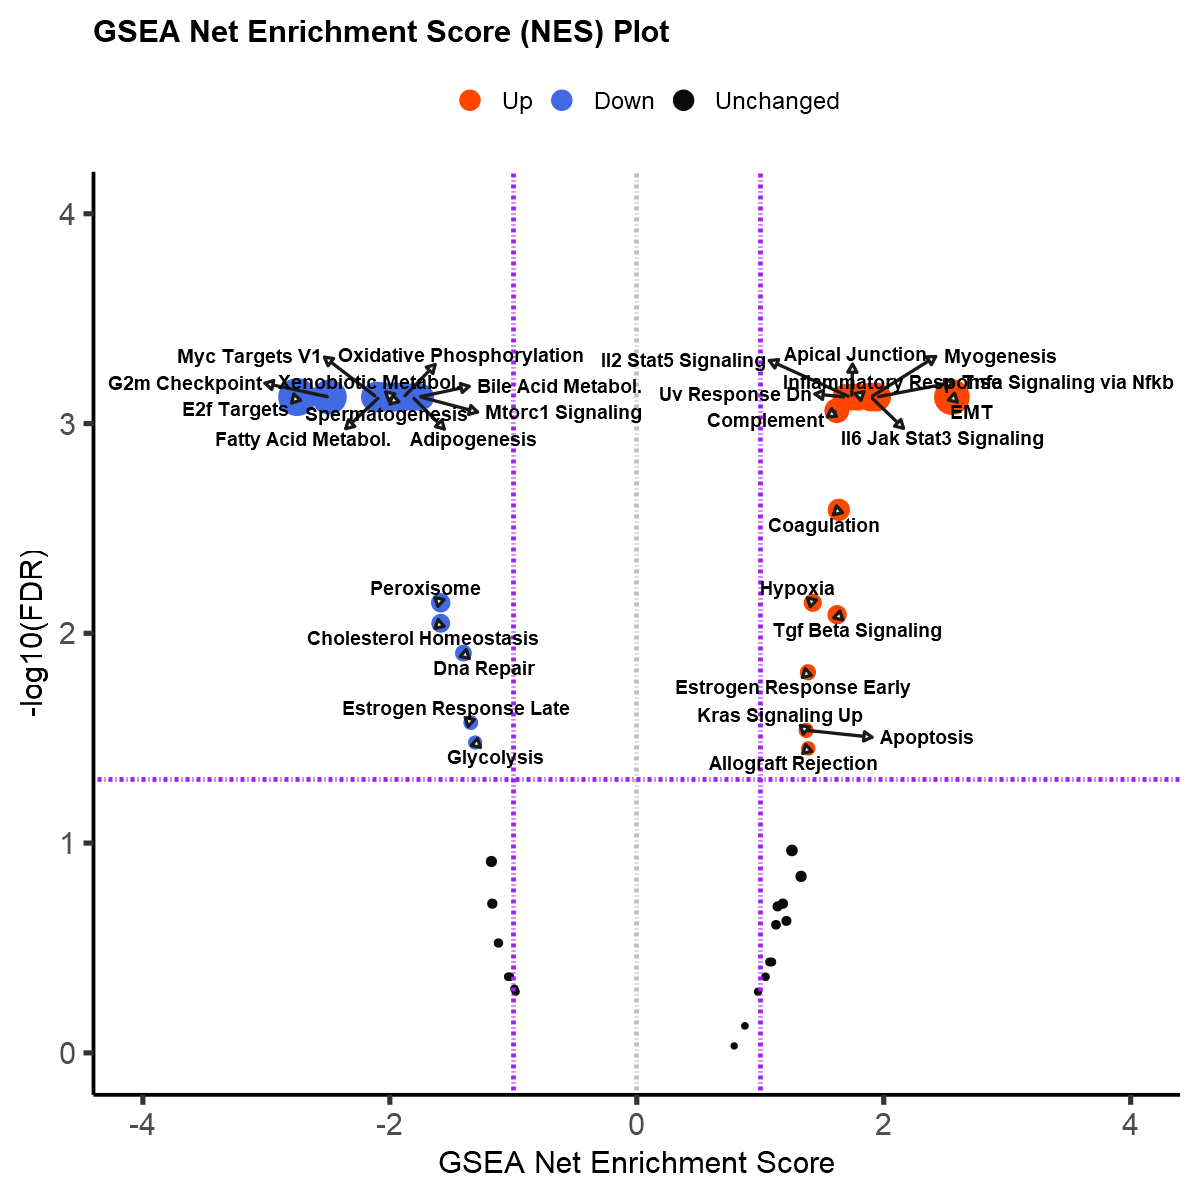

In [8]:
keyvals <- ifelse(
    (df_gsea$NES < -1.0) & (df_gsea$p.adjust <= 0.05), 'royalblue',
    ifelse((df_gsea$NES > 1) & (df_gsea$p.adjust <= 0.05), 'orangered', 'grey4'))
keyvals[is.na(keyvals)] <- 'black'
names(keyvals)[keyvals == 'orangered'] <- 'Up'
names(keyvals)[keyvals == 'grey4'] <- 'Unchanged'
names(keyvals)[keyvals == 'royalblue'] <- 'Down'

Sig_path <- df_gsea[abs(df_gsea$NES)>=1 & df_gsea$p.adjust <= 0.05,]
Sig_path <- Sig_path$Description

gg <- EnhancedVolcano(df_gsea,
                lab = rownames(df_gsea),
                caption = NULL, subtitle = NULL,
                x = 'NES',
                y = 'p.adjust', axisLabSize = 18,
                title = 'GSEA Net Enrichment Score (NES) Plot',
                xlab = "GSEA Net Enrichment Score", ylab = "-log10(FDR)",
                colCustom = keyvals,
                pointSize = c((abs(df_gsea$NES)*abs(-log10(df_gsea$p.adjust)))+1),
                xlim = c(-4, 4),
                ylim = c(0, 4),
                pCutoff = 5e-2, FCcutoff = 1, 
                selectLab = Sig_path,
                maxoverlapsConnectors = length(Sig_path),
                legendDropLevels = TRUE,
                legendLabels = c('Up', 'Down', 'Unchanged'),
                labSize = 4, labCol = 'black', labFace = 'bold',
                colAlpha = 1,
                cutoffLineType = 'blank', cutoffLineCol = 'black', cutoffLineWidth = 0.8,
                hline = c(5e-2), hlineCol = c('purple'), hlineType = c('dotdash'), hlineWidth = c(1),
                vline = c(-1, 0, 1), vlineCol = c('purple', 'grey','purple'), vlineWidth = c(1),
                vlineType = c('dotdash'),
                gridlines.major = FALSE, gridlines.minor = FALSE,
                drawConnectors = TRUE, arrowheads = TRUE, widthConnectors = 0.7)
print_figure(gg, width=10, height=10,
    file=sprintf("EnhancedVolcano_plot.%s.gsea", condstr))

### RNA-seq :: <u>GSEA plot</u> Control Vs. TGF$\beta$ 

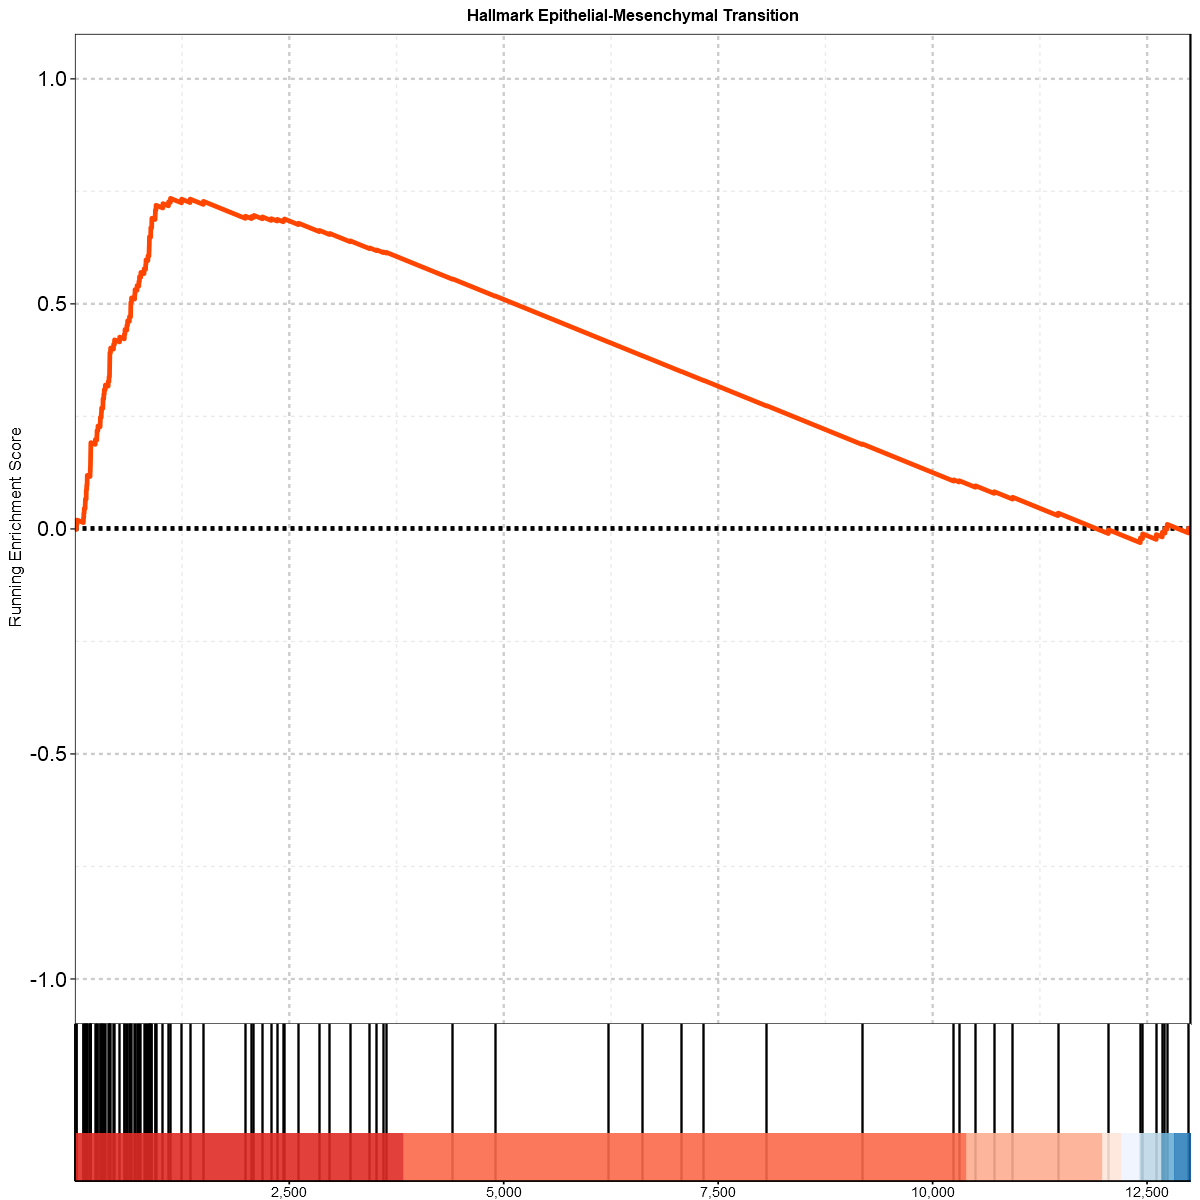

In [9]:
Title <- "Hallmark Epithelial-Mesenchymal Transition"
title <- "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"

gseaplot3(gsea_h_gene_sets, geneSetID = title, title = Title, color = "orangered", 
    base_size = 8, rel_heights = c(1.5, 0.25, 1), subplots = 1:2, pvalue_table = FALSE, 
    ES_geom = "line")

#print_figure(gg, width = 4, height = 4, f_display2screen = TRUE, file = sprintf("RNA-seq.GSEA plot.%s.%s%s", 
#    condstr, title, type_gmt))

### GSEA plot for all significant hallmark pathways

In [10]:
df_subset <- df_gsea[(abs(df_gsea$NES)>=1 & (df_gsea$p.adjust <= 0.01)),]
f <- !grepl(paste0(c("BILE_ACID_METABOLISM", "CHOLESTEROL_HOMEOSTASIS", "HEME_METABOLISM", "ALLOGRAFT_REJECTION",
                    "PANCREAS_BETA_CELLS", "ESTROGEN", "ANDROGEN", "XENOBIOTIC_METABOLISM"), collapse = "|"), df_subset$ID)
df_subset <- df_subset[f,]
IDs <- df_subset$ID
col=ifelse(df_subset$NES >1, "orangered", "#0055ee")
i=0
for (ID in IDs) {i=i+1
  verb('%s\t %s\n', rownames(gsea_h_gene_sets[gsea_h_gene_sets$ID %in% ID,]), gsea_h_gene_sets[gsea_h_gene_sets$ID %in% ID,]$NES)
  id <- rownames(df_subset[df_subset$ID %in% ID,])
  title <- paste0(id, " (NES = ", round(gsea_h_gene_sets[gsea_h_gene_sets$ID %in% ID,]$NES, digits = 3), ", FDR = ", 
                  round(gsea_h_gene_sets[gsea_h_gene_sets$ID %in% ID,]$p.adjust, digits = 3),")") 
  #verb('%s\n', title)
  gg <- gseaplot3(gsea_h_gene_sets, geneSetID = ID, title = title,
    color = col[i], base_size = 8, rel_heights = c(1.5, 0.25, 1), subplots = 1:2, pvalue_table = FALSE, ES_geom = "line")
  print_figure(gg, width=6, height=6, f_display2screen=FALSE, file=sprintf("%s.GSEA.%s.plot", condstr, tolower(ID)))
}

HALLMARK_TNFA_SIGNALING_VIA_NFKB	 1.94160181970655
HALLMARK_IL2_STAT5_SIGNALING	 1.72750115335883
HALLMARK_MYOGENESIS	 1.89575696496862
HALLMARK_UV_RESPONSE_DN	 1.69062699706141
HALLMARK_APICAL_JUNCTION	 1.74082425856345
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION	 2.55200231063649
HALLMARK_INFLAMMATORY_RESPONSE	 1.79018123055396
HALLMARK_IL6_JAK_STAT3_SIGNALING	 1.89675178061723
HALLMARK_SPERMATOGENESIS	 -1.94221231836932
HALLMARK_FATTY_ACID_METABOLISM	 -2.08466366482372
HALLMARK_ADIPOGENESIS	 -1.81518402761344
HALLMARK_G2M_CHECKPOINT	 -2.49049055511143
HALLMARK_OXIDATIVE_PHOSPHORYLATION	 -1.88742394598806
HALLMARK_MYC_TARGETS_V1	 -2.10876841073082
HALLMARK_MTORC1_SIGNALING	 -1.74993115267526
HALLMARK_E2F_TARGETS	 -2.75077854514675
HALLMARK_COMPLEMENT	 1.61996397909005
HALLMARK_COAGULATION	 1.63631248442579
HALLMARK_HYPOXIA	 1.42543418173946
HALLMARK_PEROXISOME	 -1.58789034098557
HALLMARK_TGF_BETA_SIGNALING	 1.62236293352541


## RNA-seq :: Volcano plot TGF$\beta$ Vs. TGF$\beta$ + CX5461
**Volcano plot and GSEA plot for TGF$\beta$ Vs. TGF$\beta$ + CX5461.**

### RNA-seq :: GSEA Analysis

In [11]:
condstr <- 'RNA-seq.TGFb.CX5461'

In [12]:
colnames(df_all)
nv <- sign(df_all$log2FCtgfbVStgfbCX5461.transcription)*(-log10(df_all$PtgfbVStgfbCX5461.transcription))
names(nv) <- rownames(df_all);
f <- is.finite(nv); t <- min(nv[f]); nv[nv < t] <- t*1.1; t <- max(nv[f]); nv[nv > t] <- t*1.1


set.seed(seed_gsea)
gsea_all <- GSEA(sort(nv[!is.na(nv)], decreasing=T), exponent =1,
                 nPerm = 10000, minGSSize = 5, maxGSSize = 500,   
                 pvalueCutoff = 0.99, pAdjustMethod = "BH", 
                 TERM2GENE=gmt_mus, TERM2NAME=NA, seed=FALSE, by="fgsea")

head(gsea_all); dim(gsea_all)

gsea_h_gene_sets <- GSEA(sort(nv[!is.na(nv)], decreasing=T), exponent =1,
                         nPerm = 10000, minGSSize = 5, maxGSSize = 500,   
                         pvalueCutoff = 0.99, pAdjustMethod = "BH", 
                         TERM2GENE=h_gene_sets, TERM2NAME=NA, seed=FALSE, by="fgsea")
head(gsea_h_gene_sets); dim(gsea_h_gene_sets)

[1] "seqnames"                            
 [2] "start"                               
 [3] "end"                                 
 [4] "width"                               
 [5] "strand"                              
 [6] "source"                              
 [7] "unt.transcription"                   
 [8] "tgfb.transcription"                  
 [9] "tgfbCX5461.transcription"            
[10] "log2FCuntVStgfb.transcription"       
[11] "FDRuntVStgfb.transcription"          
[12] "PuntVStgfb.transcription"            
[13] "log2FCtgfbVStgfbCX5461.transcription"
[14] "FDRtgfbVStgfbCX5461.transcription"   
[15] "PtgfbVStgfbCX5461.transcription"     
[16] "unt.tgfb.DEtranscription"            
[17] "tgfb.tgfbCX5461.DEtranscription"     
[18] "reversible.transcription"            
[19] "unt.translation"                     
[20] "tgfb.translation"                    
[21] "tgfbCX5461.translation"              
[22] "log2FCuntVStgfb.translation"         
[23] "FDRuntVStgfb.translation"            
[24] "PuntVStgfb.translation"              
[25] "log2FCtgfbVStgfbCX5461.translation"  
[26] "FDRtgfbVStgfbCX5461.translation"     
[27] "PtgfbVStgfbCX5461.translation"       
[28] "unt.tgfb.DEtranslation"              
[29] "tgfb.tgfbCX5461.DEtranslation"       
[30] "reversible.translation"              
[31] "biotype"

preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
"We do not recommend using nPerm parameter incurrent and future releases"
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
"You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.36% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
leading edge analysis...

done...



,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
KEGG_LYSOSOME,KEGG_LYSOSOME,KEGG_LYSOSOME,105,0.6385298,2.110595,0.0001690617,0.007493412,0.005980861,1618,"tags=37%, list=12%, signal=33%",Ctsd/Atp6v0d1/Atp6ap1/Tpp1/Ctsa/Gaa/Lgmn/Atp6v0b/Ctsb/Man2b1/Hyal1/Atp6v0c/Igf2r/Gla/Ap3d1/Ap1b1/Abca2/Cd63/Gns/Psap/Gba/Tcirg1/Glb1/Mcoln1/Lamp1/Neu1/Arsa/Fuca1/Sgsh/Ctsz/Smpd1/Cltb/Slc11a1/Gm2a/Gnptg/Naga/Atp6v0a1/Asah1/Arsb
KEGG_DNA_REPLICATION,KEGG_DNA_REPLICATION,KEGG_DNA_REPLICATION,35,-0.7504325,-2.135530,0.0002189142,0.007493412,0.005980861,1620,"tags=54%, list=12%, signal=48%",Pole/Mcm2/Pole2/Pold2/Mcm7/Pold1/Rfc1/Fen1/Rfc4/Lig1/Dna2/Rpa1/Prim1/Mcm5/Mcm3/Pola1/Mcm4/Pcna/Mcm6
KEGG_SYSTEMIC_LUPUS_ERYTHEMATOSUS,KEGG_SYSTEMIC_LUPUS_ERYTHEMATOSUS,KEGG_SYSTEMIC_LUPUS_ERYTHEMATOSUS,75,-0.8245630,-2.722380,0.0002326664,0.007493412,0.005980861,665,"tags=64%, list=5%, signal=61%",H2bc12/Ssb/H2ac6/H4c4/Snrpd3/H2bc22/H3c15/H3c2/H2ac24/Macroh2a1/H3c13/H2ac22/H2ac15/H2bc15/H4c3/H3c11/H2ac7/H3c6/H4f16/H4c9/H4c12/Snrpd1/H4c6/H4c8/H2bc14/H2ac8/H4c14/H4c11/H3c1/H2ac10/H4c18/H2ac11/H2bc3/H2bc13/H2ac4/H3c3/H2ac20/H3c7/H3c10/H2bc11/H2bc18/H2ax/H4c2/H3c8/H2bc6/H2bc7/H2az1/H2bc8
KEGG_PYRIMIDINE_METABOLISM,KEGG_PYRIMIDINE_METABOLISM,KEGG_PYRIMIDINE_METABOLISM,87,-0.5679396,-1.914782,0.0002384927,0.007493412,0.005980861,1851,"tags=33%, list=14%, signal=29%",Prim2/Nme2/Polr3f/Uck2/Pole/Polr3b/Pole2/Pold2/Ak3/Pold1/Nudt2/Dhodh/Polr2b/Polr2d/Pnp2/Dtymk/Umps/Nt5e/Dck/Polr1a/Polr1b/Polr3k/Rrm1/Tk1/Prim1/Tyms/Pola1/Rrm2/Dut
KEGG_CELL_CYCLE,KEGG_CELL_CYCLE,KEGG_CELL_CYCLE,118,-0.5769687,-2.044696,0.0002449180,0.007493412,0.005980861,1538,"tags=45%, list=12%, signal=40%",Tgfb3/Mcm2/Ywhah/Tgfb2/Smad2/Stag2/Mcm7/Ywhaz/Anapc1/Skp2/Pkmyt1/Ywhae/Stag1/Orc5/Tfdp1/Orc2/Atm/Cdkn2d/Bub1/Hdac2/Cdc20/Pttg1/Cdc7/Cdc25c/Ccne2/Smc1a/Ttk/E2f3/Dbf4/Ywhaq/Chek2/Cdc45/Ccne1/Rbl1/Cdc6/Orc6/Ccnb2/Cdk1/Smc3/Cdk6/Mcm5/Mcm3/Rad21/Anapc5/Bub1b/Ccnb1/Mad2l1/Plk1/Mcm4/Pcna/Espl1/Ccna2/Mcm6
KEGG_SPLICEOSOME,KEGG_SPLICEOSOME,KEGG_SPLICEOSOME,121,-0.6365948,-2.261983,0.0002470356,0.007493412,0.005980861,2016,"tags=40%, list=16%, signal=35%",Prpf3/Snrnp200/Rbm8a/Magohb/Ddx42/Srsf10/Lsm8/U2af1/Snw1/Snrpc/Lsm6/Snrpd2/Snrnp70/Snu13/Aqr/Isy1/Hnrnpk/Rbm22/Rbm25/Hnrnpu/Thoc1/Snrpe/Snrpg/Dhx15/Alyref/Ppil1/Snrpa1/Ncbp2/Prpf40a/Cdc5l/Snrpd3/Srsf1/Srsf6/Lsm3/Prpf18/Rbmx/Usp39/Tra2b/Snrpf/Hnrnpm/Prpf19/Sf3a3/Sf3b3/Hnrnpa3/Srsf2/Srsf3/Snrpd1/Srsf7/Hnrnpa1


[1] 182  11

preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
"We do not recommend using nPerm parameter incurrent and future releases"
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
"You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.36% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
leading edge analysis...

done...



,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
HALLMARK_P53_PATHWAY,HALLMARK_P53_PATHWAY,HALLMARK_P53_PATHWAY,179,0.7086431,2.506404,0.0001615509,0.001031694,0.0004561172,1002,"tags=34%, list=8%, signal=32%",Btg2/Ccng1/Cdkn1a/Ctsd/Ephx1/Itgb4/Mdm2/Zmat3/Abhd4/Plk2/Osgin1/Perp/Lif/Bax/Cd81/Dcxr/Phlda3/Tcn2/Hmox1/Tob1/Txnip/Aen/Jun/Rhbdf2/Plxnb2/Epha2/Ptpn14/Ppp1r15a/Ndrg1/Ninj1/Traf4/Slc19a2/Pvt1/Blcap/Rps27l/Pmm1/Atf3/Slc3a2/S100a10/Ccnd2/Ak1/Eps8l2/Foxo3/Rack1/Hras/Ei24/Sertad3/Pidd1/Zfp36l1/Ier5/Prmt2/Ddit3/H2aj/Xpc/Mxd1/App/Fuca1/Klf4/Cdkn2a/Mapkapk3/Rpl18
HALLMARK_HYPOXIA,HALLMARK_HYPOXIA,HALLMARK_HYPOXIA,160,0.5162490,1.800862,0.0001637465,0.001031694,0.0004561172,1231,"tags=26%, list=9%, signal=23%",Cdkn1a/Tnfaip3/Plin2/Aldoa/Ccn1/Eno3/Hmox1/Fosl2/Tgm2/Jun/Bhlhe40/Dusp1/Ppp1r15a/Ndrg1/F3/Gaa/Atf3/Cav1/Gapdh/Slc25a1/Foxo3/Hk1/Angptl4/Pdgfb/Prdx5/Ddit3/Maff/Plaur/Pnrc1/Vldlr/Nagk/Ndst1/Egfr/Pgm1/Nedd4l/Ilvbl/Fos/Klf6/Gpi1/Tpbg/Grhpr
HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,157,0.6678276,2.325262,0.0001638538,0.001031694,0.0004561172,1221,"tags=32%, list=9%, signal=29%",Btg2/Cdkn1a/Sqstm1/Tnfaip3/Plk2/Lif/Gadd45b/Ccn1/Ccl2/Csf1/Fosl2/Ehd1/Lamb3/Dusp4/Jun/Bhlhe40/Dusp1/Rela/Ppp1r15a/Phlda1/Nfkbia/Litaf/F3/Ninj1/Clcf1/Atf3/Ets2/Nfkb2/Map2k3/Bcl6/Areg/Ier5/Edn1/Cebpb/Dusp5/Maff/Plaur/Inhba/Pnrc1/Ccnd1/Mxd1/Sgk1/Klf10/Relb/Klf4/Dennd5a/Tnip1/Fos/Klf6/Socs3
HALLMARK_APOPTOSIS,HALLMARK_APOPTOSIS,HALLMARK_APOPTOSIS,121,0.5162481,1.741163,0.0001669170,0.001031694,0.0004561172,996,"tags=22%, list=8%, signal=21%",Btg2/Cdkn1a/Gsn/Sqstm1/Lgals3/Bax/Gpx4/Gadd45b/Bcl2l1/Hmox1/Txnip/Jun/Rela/Pmaip1/Atf3/Cav1/Ccnd2/Igf2r/Clu/Tnfrsf12a/Lmna/Timp1/Ddit3/Ccnd1/App/Tspo/Smad7
HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,124,0.5611430,1.896615,0.0001670565,0.001031694,0.0004561172,550,"tags=19%, list=4%, signal=19%",Itgb4/Bmp1/Itga3/Vcl/Lamb3/Actn1/Nectin2/Zyx/Flnc/Exoc4/Cnn2/Acta1/Actn4/Src/Pcdh1/Vwf/Pkd1/Pfn1/Nectin1/Cap1/Hras/Rras/Sympk/Inppl1
HALLMARK_MYOGENESIS,HALLMARK_MYOGENESIS,HALLMARK_MYOGENESIS,122,0.6281661,2.119270,0.0001674481,0.001031694,0.0004561172,1018,"tags=26%, list=8%, signal=24%",Cdkn1a/Gsn/Itgb4/Ptp4a3/Gadd45b/Agrn/Eno3/Myo1c/Atp6ap1/Tsc2/Plxnb2/Bhlhe40/Mapre3/Gaa/Sorbs1/Acta1/Slc6a8/Ak1/Flii/Ncam1/Fst/Clu/Smtn/Gnao1/Col4a2/Igfbp7/Pde4dip/App/Gabarapl2/Pdlim7/Kifc3/Cox7a1


[1] 50 11

In [13]:
df_gsea <- as.data.frame(gsea_h_gene_sets)
idx <- order(df_gsea$p.adjust)
df_gsea <- df_gsea[idx,]

# change name
df_gsea$Description <- tolower(df_gsea$Description)
df_gsea$Description <- mgsub::mgsub(df_gsea$Description,
        tolower(c('HALLMARK','KEGG','EPITHELIAL_MESENCHYMAL_TRANSITION','_')),
        c('','','EMT',' '))
df_gsea$Description <- stringr::str_to_title(df_gsea$Description)
df_gsea$Description <- mgsub::mgsub(df_gsea$Description,
        c('Emt', 'Via','Metabolism'), c('EMT', 'via', 'Metabol.'))
rownames(df_gsea) <- df_gsea$Description

df_gsea$Description

[1] " P53 Pathway"                     " Hypoxia"                        
 [3] " Tnfa Signaling via Nfkb"         " Apoptosis"                      
 [5] " Apical Junction"                 " Myogenesis"                     
 [7] " Inflammatory Response"           " Myc Targets V2"                 
 [9] " Spermatogenesis"                 " Mitotic Spindle"                
[11] " G2m Checkpoint"                  " E2f Targets"                    
[13] " Myc Targets V1"                  " Adipogenesis"                   
[15] " Complement"                      " Coagulation"                    
[17] " Il2 Stat5 Signaling"             " EMT"                            
[19] " Cholesterol Homeostasis"         " Uv Response Up"                 
[21] " Unfolded Protein Response"       " Estrogen Response Early"        
[23] " Oxidative Phosphorylation"       " Xenobiotic Metabol."            
[25] " Kras Signaling Up"               " Uv Response Dn"                 
[27] " Allograft Rejection"             " Interferon Gamma Response"      
[29] " Mtorc1 Signaling"                " Estrogen Response Late"         
[31] " Interferon Alpha Response"       " Il6 Jak Stat3 Signaling"        
[33] " Reactive Oxygen Species Pathway" " Fatty Acid Metabol."            
[35] " Angiogenesis"                    " Pi3k Akt Mtor Signaling"        
[37] " Dna Repair"                      " Apical Surface"                 
[39] " Hedgehog Signaling"              " Androgen Response"              
[41] " Glycolysis"                      " Heme Metabol."                  
[43] " Kras Signaling Dn"               " Protein Secretion"              
[45] " Pancreas Beta Cells"             " Bile Acid Metabol."             
[47] " Tgf Beta Signaling"              " Notch Signaling"                
[49] " Peroxisome"                      " Wnt Beta Catenin Signaling"

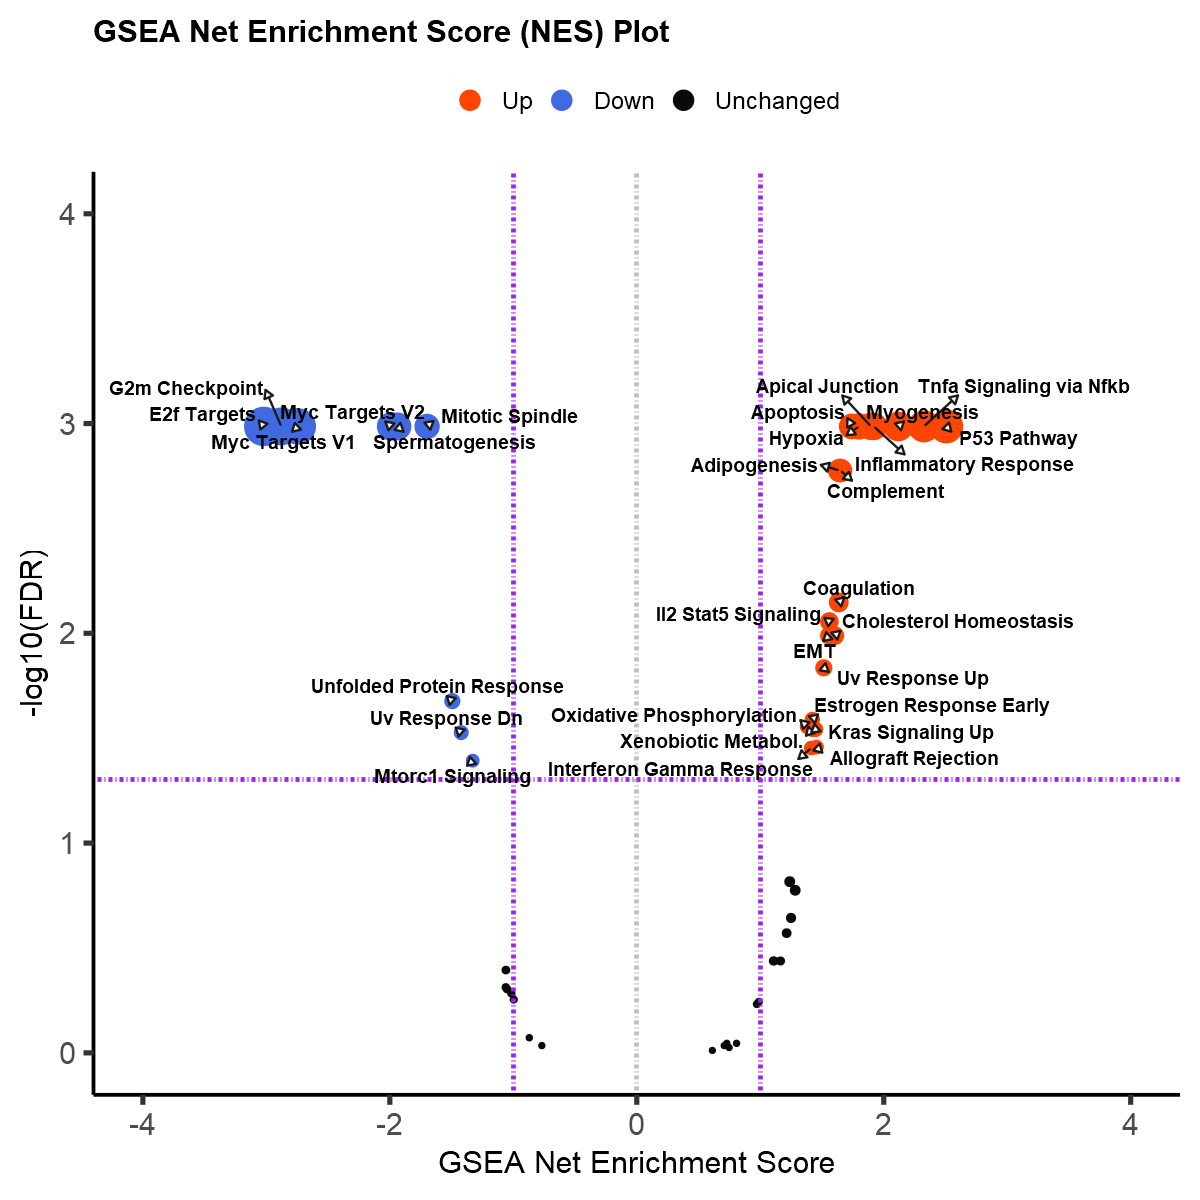

In [14]:
keyvals <- ifelse(
    (df_gsea$NES < -1.0) & (df_gsea$p.adjust <= 0.05), 'royalblue',
    ifelse((df_gsea$NES > 1) & (df_gsea$p.adjust <= 0.05), 'orangered', 'grey4'))
keyvals[is.na(keyvals)] <- 'black'
names(keyvals)[keyvals == 'orangered'] <- 'Up'
names(keyvals)[keyvals == 'grey4'] <- 'Unchanged'
names(keyvals)[keyvals == 'royalblue'] <- 'Down'

Sig_path <- df_gsea[abs(df_gsea$NES)>=1 & df_gsea$p.adjust <= 0.05,]
Sig_path <- Sig_path$Description

gg <- EnhancedVolcano(df_gsea,
                lab = rownames(df_gsea),
                caption = NULL, subtitle = NULL,
                x = 'NES',
                y = 'p.adjust', axisLabSize = 18,
                title = 'GSEA Net Enrichment Score (NES) Plot',
                xlab = "GSEA Net Enrichment Score", ylab = "-log10(FDR)",
                colCustom = keyvals,
                pointSize = c((abs(df_gsea$NES)*abs(-log10(df_gsea$p.adjust)))+1),
                xlim = c(-4, 4),
                ylim = c(0, 4),
                pCutoff = 5e-2, FCcutoff = 1, 
                selectLab = Sig_path,
                maxoverlapsConnectors = length(Sig_path),
                legendDropLevels = TRUE,
                legendLabels = c('Up', 'Down', 'Unchanged'),
                labSize = 4, labCol = 'black', labFace = 'bold',
                colAlpha = 1,
                cutoffLineType = 'blank', cutoffLineCol = 'black', cutoffLineWidth = 0.8,
                hline = c(5e-2), hlineCol = c('purple'), hlineType = c('dotdash'), hlineWidth = c(1),
                vline = c(-1, 0, 1), vlineCol = c('purple', 'grey','purple'), vlineWidth = c(1),
                vlineType = c('dotdash'),
                gridlines.major = FALSE, gridlines.minor = FALSE,
                drawConnectors = TRUE, arrowheads = TRUE, widthConnectors = 0.5)
print_figure(gg, width=10, height=10,
    file=sprintf("EnhancedVolcano_plot.%s.gsea", condstr))

### RNA-seq :: GSEA plot for TGF$\beta$ Vs. TGF$\beta$ + CX5461

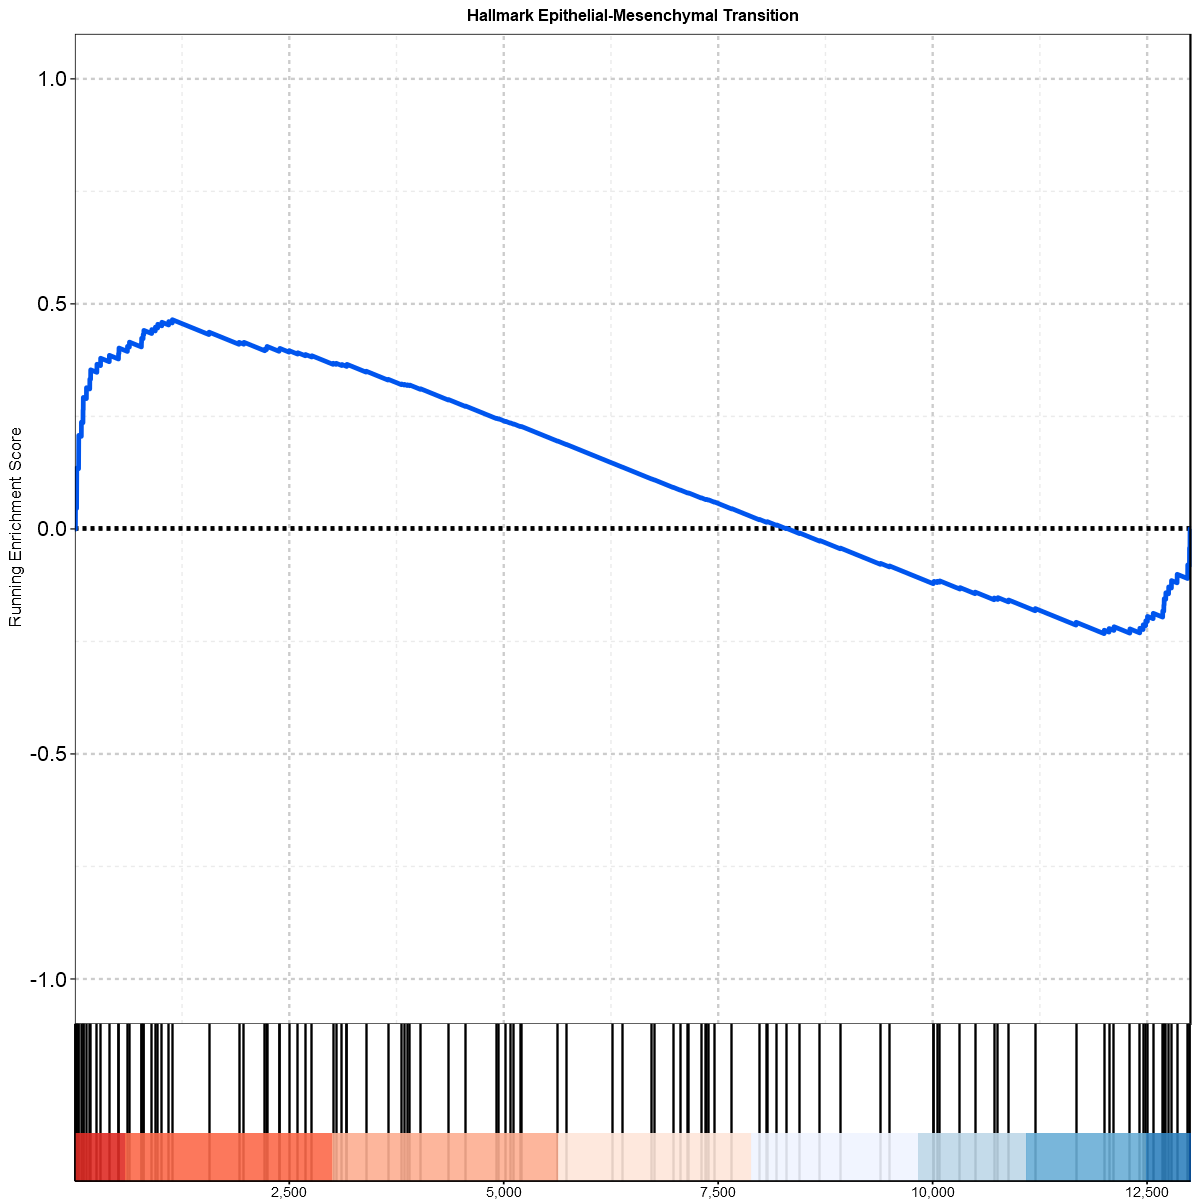

In [15]:
Title <- "Hallmark Epithelial-Mesenchymal Transition"
title <- "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"

gseaplot3(gsea_h_gene_sets, geneSetID = title, title = Title, color = "#0055ee", 
    base_size = 8, rel_heights = c(1.5, 0.25, 1), subplots = 1:2, pvalue_table = FALSE, 
    ES_geom = "line")

#print_figure(gg, width = 4, height = 4, f_display2screen = TRUE, file = sprintf("RNA-seq.GSEA plot.%s.%s%s", 
#    condstr, title, type_gmt))

### GSEA plot for all significant hallmark pathways

In [16]:
df_subset <- df_gsea[(abs(df_gsea$NES)>=1 & (df_gsea$p.adjust <= 0.01)),]
f <- !grepl(paste0(c("BILE_ACID_METABOLISM", "CHOLESTEROL_HOMEOSTASIS", "HEME_METABOLISM", "ALLOGRAFT_REJECTION",
                    "PANCREAS_BETA_CELLS", "ESTROGEN", "ANDROGEN", "XENOBIOTIC_METABOLISM"), collapse = "|"), df_subset$ID)
df_subset <- df_subset[f,]
IDs <- df_subset$ID
col=ifelse(df_subset$NES >1, "orangered", "#0055ee")
i=0
for (ID in IDs) {i=i+1
  verb('%s\t %s\n', rownames(gsea_h_gene_sets[gsea_h_gene_sets$ID %in% ID,]), gsea_h_gene_sets[gsea_h_gene_sets$ID %in% ID,]$NES)
  id <- rownames(df_subset[df_subset$ID %in% ID,])
  title <- paste0(id, " (NES = ", round(gsea_h_gene_sets[gsea_h_gene_sets$ID %in% ID,]$NES, digits = 3), ", FDR = ", 
                  round(gsea_h_gene_sets[gsea_h_gene_sets$ID %in% ID,]$p.adjust, digits = 3),")") 
  #verb('%s\n', title)
  gg <- gseaplot3(gsea_h_gene_sets, geneSetID = ID, title = title,
    color = col[i], base_size = 8, rel_heights = c(1.5, 0.25, 1), subplots = 1:2, pvalue_table = FALSE, ES_geom = "line")
  print_figure(gg, width=6, height=6, f_display2screen=FALSE, file=sprintf("%s.GSEA.%s.plot", condstr, tolower(ID)))
}

HALLMARK_P53_PATHWAY	 2.50640418145791
HALLMARK_HYPOXIA	 1.80086205486745
HALLMARK_TNFA_SIGNALING_VIA_NFKB	 2.32526194190574
HALLMARK_APOPTOSIS	 1.74116341160474
HALLMARK_APICAL_JUNCTION	 1.89661457762224
HALLMARK_MYOGENESIS	 2.11926961171783
HALLMARK_INFLAMMATORY_RESPONSE	 1.91899078882894
HALLMARK_MYC_TARGETS_V2	 -1.99013354047548
HALLMARK_SPERMATOGENESIS	 -1.93822115486107
HALLMARK_MITOTIC_SPINDLE	 -1.69810413263307
HALLMARK_G2M_CHECKPOINT	 -2.87940548459333
HALLMARK_E2F_TARGETS	 -3.02108335189913
HALLMARK_MYC_TARGETS_V1	 -2.74530158083493
HALLMARK_ADIPOGENESIS	 1.64267716359567
HALLMARK_COMPLEMENT	 1.64973898379064
HALLMARK_COAGULATION	 1.6357058446478
HALLMARK_IL2_STAT5_SIGNALING	 1.55946856444607


# Ribo-seq :: Volcano plot and GSEA enrichment plot
In this part of analysis I will perform GSEA analysis and generate volcano plot and GSEA enrichment plot.

## Ribo-seq Control Vs. TGF$\beta$

### Ribo-seq :: volcano plot

In [17]:
condstr <- 'Ribo-seq.Unt.TGFb'

In [18]:
nv <- sign(df_all$log2FCuntVStgfb.translation)*(-log10(df_all$PuntVStgfb.translation))
names(nv) <- rownames(df_all);
f <- is.finite(nv); t <- min(nv[f]); nv[nv < t] <- t*1.1; t <- max(nv[f]); nv[nv > t] <- t*1.1


set.seed(seed_gsea)
gsea_all <- GSEA(sort(nv[!is.na(nv)], decreasing=T), exponent =1,
                 nPerm = 10000, minGSSize = 5, maxGSSize = 500,   
                 pvalueCutoff = 0.99, pAdjustMethod = "BH", 
                 TERM2GENE=gmt_mus, TERM2NAME=NA, seed=FALSE, by="fgsea")

head(gsea_all); dim(gsea_all)

gsea_h_gene_sets <- GSEA(sort(nv[!is.na(nv)], decreasing=T), exponent =1,
                         nPerm = 10000, minGSSize = 5, maxGSSize = 500,   
                         pvalueCutoff = 0.99, pAdjustMethod = "BH", 
                         TERM2GENE=h_gene_sets, TERM2NAME=NA, seed=FALSE, by="fgsea")
head(gsea_h_gene_sets); dim(gsea_h_gene_sets)

preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
"We do not recommend using nPerm parameter incurrent and future releases"
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
"You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (2.16% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
leading edge analysis...

done...



,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
KEGG_REGULATION_OF_ACTIN_CYTOSKELETON,KEGG_REGULATION_OF_ACTIN_CYTOSKELETON,KEGG_REGULATION_OF_ACTIN_CYTOSKELETON,128,0.5612306,1.793482,0.0001530222,0.003568964,0.002656745,887,"tags=21%, list=7%, signal=20%",Actb/Actn1/Baiap2/Fn1/Gsn/Itga5/Itgb1/Itgb3/Msn/Myh9/Pdgfb/Tmsb4x/Vcl/Itgav/Itgb6/Fgd3/Itgb5/Pdgfa/Bcar1/Itga2/Actn4/Actg1/Rras/Myl12a/Ssh3/Pdgfrb/Cd14
KEGG_FOCAL_ADHESION,KEGG_FOCAL_ADHESION,KEGG_FOCAL_ADHESION,126,0.6440496,2.054944,0.0001535155,0.003568964,0.002656745,881,"tags=29%, list=7%, signal=27%",Actb/Actn1/Col4a1/Col4a2/Fn1/Itga5/Itgb1/Itgb3/Lamb3/Pdgfb/Spp1/Thbs1/Vcl/Zyx/Itgav/Capn2/Flnb/Itgb6/Col5a1/Itgb5/Tln1/Pdgfa/Col1a1/Bcar1/Jun/Vegfa/Itga2/Flna/Ilk/Actn4/Actg1/Col5a3/Lamb1/Myl12a/Tln2/Col6a1/Pdgfrb
KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION,KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION,KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION,69,0.6077957,1.788023,0.0001625752,0.003568964,0.002656745,1264,"tags=33%, list=11%, signal=30%",Ccl2/Clcf1/Csf1/Il11/Lif/Pdgfb/Inhba/Pdgfa/Acvr1/Ccl7/Tgfbr1/Tnfrsf1b/Vegfa/Csf2/Tgfb2/Relt/Ifnar1/Pdgfrb/Tgfb1/Vegfc/Il18rap/Il17ra/Il6
KEGG_ECM_RECEPTOR_INTERACTION,KEGG_ECM_RECEPTOR_INTERACTION,KEGG_ECM_RECEPTOR_INTERACTION,38,0.8328908,2.202516,0.0001719395,0.003568964,0.002656745,851,"tags=63%, list=7%, signal=59%",Cd44/Col4a1/Col4a2/Fn1/Hspg2/Itga5/Itgb1/Itgb3/Lamb3/Spp1/Thbs1/Itgav/Itgb6/Sdc1/Col5a1/Itgb5/Col1a1/Sdc3/Itga2/Agrn/Col5a3/Lamb1/Dag1/Col6a1
KEGG_DILATED_CARDIOMYOPATHY,KEGG_DILATED_CARDIOMYOPATHY,KEGG_DILATED_CARDIOMYOPATHY,35,0.7308588,1.906433,0.0001724733,0.003568964,0.002656745,1244,"tags=54%, list=10%, signal=49%",Actb/Itga5/Itgb1/Itgb3/Itgav/Itgb6/Itgb5/Gnas/Tpm1/Tpm4/Itga2/Actg1/Tgfb2/Tnnt2/Dag1/Tgfb1/Cacna2d1/Cacnb3/Lmna
KEGG_HYPERTROPHIC_CARDIOMYOPATHY_HCM,KEGG_HYPERTROPHIC_CARDIOMYOPATHY_HCM,KEGG_HYPERTROPHIC_CARDIOMYOPATHY_HCM,36,0.7161908,1.876006,0.0001725328,0.003568964,0.002656745,1264,"tags=56%, list=11%, signal=50%",Actb/Itga5/Itgb1/Itgb3/Itgav/Itgb6/Itgb5/Tpm1/Tpm4/Itga2/Actg1/Tgfb2/Tnnt2/Dag1/Tgfb1/Cacna2d1/Prkaa1/Cacnb3/Lmna/Il6


[1] 181  11

preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
"We do not recommend using nPerm parameter incurrent and future releases"
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
"You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (2.16% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
leading edge analysis...

done...



,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
HALLMARK_MITOTIC_SPINDLE,HALLMARK_MITOTIC_SPINDLE,HALLMARK_MITOTIC_SPINDLE,185,0.5239301,1.746606,0.0001455180,0.0008936071,0.0003574429,1827,"tags=29%, list=15%, signal=25%",Gsn/Myh9/Palld/Vcl/Epb41l2/Flnb/Nedd9/Septin9/Sun2/Notch2/Llgl1/Stk38l/Bcar1/Capzb/Map1s/Myo1e/Sptan1/Flna/Tuba4a/Actn4/Marcks/Abr/Cdc27/Cdc42ep1/Stau1/Clasp1/Tbcd/Shroom1/Numa1/Trio/Hdac6/Klc1/Lmnb1/Ophn1/Myo9b/Sptbn1/Abl1/Alms1/Bcr/Cdc42bpa/Kif4/Nin/Tubd1/Mapre1/Rasa1/Dync1h1/Cep72/Bcl2l11/Plekhg2/Als2/Pcm1/Pkd2/Cep192
HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,150,0.6201076,2.014228,0.0001490091,0.0008936071,0.0003574429,803,"tags=39%, list=7%, signal=37%",Bhlhe40/Ccl2/Ccn1/Cd44/Clcf1/Csf1/F3/Gadd45b/Jag1/Klf10/Lamb3/Lif/Nfkbia/Ptgs2/Rhob/Sat1/Serpine1/Sgk1/Tnfaip3/B4galt1/Gadd45a/Ier3/Inhba/Hes1/Pmepa1/Dusp4/Hbegf/Pfkfb3/Junb/Irf1/Rnf19b/Fosb/Nfkb2/Litaf/Sphk1/Spsb1/Fosl2/Dusp2/Dusp5/Jun/Trib1/Vegfa/Csf2/Tnip1/Tgif1/Edn1/B4galt5/Olr1/Tubb2a/Tsc22d1/Plk2/Tiparp/Ier5/Maff/Tnip2/Ehd1/Marcks/Plau/Klf6
HALLMARK_IL2_STAT5_SIGNALING,HALLMARK_IL2_STAT5_SIGNALING,HALLMARK_IL2_STAT5_SIGNALING,119,0.5508972,1.734644,0.0001550628,0.0008936071,0.0003574429,851,"tags=28%, list=7%, signal=26%",Bhlhe40/Cd44/Csf1/Gadd45b/Lif/Nt5e/Plin2/Rhob/Spp1/Tgm2/Prnp/Itgav/Pim1/Cd81/Hk2/Eno3/Wls/Cish/Capg/Ecm1/Tnfrsf1b/Lrrc8c/Glipr2/Csf2/Myo1e/Selp/Ckap4/Ahr/Maff/Dhrs3/Myo1c/Klf6/Col6a1
HALLMARK_COMPLEMENT,HALLMARK_COMPLEMENT,HALLMARK_COMPLEMENT,114,0.5942426,1.863308,0.0001551831,0.0008936071,0.0003574429,1150,"tags=32%, list=10%, signal=29%",Clu/Col4a2/Csrp1/Ctsl/F3/Fn1/Lrp1/Mmp14/Pdgfb/Serpine1/Tnfaip3/Calm1/Cp/Pim1/Pla2g4a/Timp1/Irf1/Dusp5/Lipa/Zeb1/Lgmn/Cblb/Olr1/Maff/Ehd1/Ctsc/Anxa5/Prcp/Cebpb/Notch4/Xpnpep1/Prep/Usp15/Jak2/Prkcd/Lta4h
HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,112,0.6091480,1.905679,0.0001554968,0.0008936071,0.0003574429,903,"tags=29%, list=8%, signal=27%",Actb/Actn1/Baiap2/Bmp1/Itgb1/Jup/Lamb3/Msn/Myh9/Vcl/Zyx/B4galt1/Epb41l2/Cnn2/Cdh6/Map3k20/Rsu1/Cldn4/Sdc3/Itga2/Mmp9/Skap2/Plcg1/Acta1/Actn4/Cap1/Nectin2/Actg1/Atp1a3/Rras/Nectin3/Pcdh1
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,108,0.8144037,2.532294,0.0001566416,0.0008936071,0.0003574429,923,"tags=64%, list=8%, signal=60%",Bmp1/Cald1/Ccn1/Ccn2/Cd44/Col12a1/Col4a1/Col4a2/Colgalt1/Fbln2/Fn1/Gadd45b/Itga5/Itgb1/Itgb3/Lrp1/Mmp14/Nt5e/Plod2/Rhob/Sat1/Serpine1/Sparc/Spp1/Tgm2/Thbs1/Tnfaip3/Gadd45a/Inhba/Itgav/Pmepa1/Cdh2/Cdh6/Sdc1/Timp1/Glipr1/Vim/Col5a1/Efemp2/Itgb5/Capg/Col7a1/Loxl2/Tpm1/Notch2/Ecm1/Qsox1/Tpm4/Col1a1/Jun/Tagln/Pvr/Gja1/Plod1/Vegfa/Lgals1/Itga2/Flna/Adam12/Gpc1/Bdnf/Col5a3/Fermt2/Crlf1/Copa/Pmp22/Pdgfrb/Acta2/Tgfb1


[1] 50 11

In [19]:
df_gsea <- as.data.frame(gsea_h_gene_sets)
idx <- order(df_gsea$p.adjust)
df_gsea <- df_gsea[idx,]

# change name
df_gsea$Description <- tolower(df_gsea$Description)
df_gsea$Description <- mgsub::mgsub(df_gsea$Description,
        tolower(c('HALLMARK','KEGG','EPITHELIAL_MESENCHYMAL_TRANSITION','_')),
        c('','','EMT',' '))
df_gsea$Description <- stringr::str_to_title(df_gsea$Description)
df_gsea$Description <- mgsub::mgsub(df_gsea$Description,
        c('Emt', 'Via','Metabolism'), c('EMT', 'via', 'Metabol.'))
rownames(df_gsea) <- df_gsea$Description

df_gsea$Description

[1] " Mitotic Spindle"                 " Tnfa Signaling via Nfkb"        
 [3] " Il2 Stat5 Signaling"             " Complement"                     
 [5] " Apical Junction"                 " EMT"                            
 [7] " Myogenesis"                      " Inflammatory Response"          
 [9] " Coagulation"                     " Cholesterol Homeostasis"        
[11] " Fatty Acid Metabol."             " Xenobiotic Metabol."            
[13] " Adipogenesis"                    " Oxidative Phosphorylation"      
[15] " Mtorc1 Signaling"                " Myc Targets V1"                 
[17] " Il6 Jak Stat3 Signaling"         " P53 Pathway"                    
[19] " Uv Response Dn"                  " Bile Acid Metabol."             
[21] " Hypoxia"                         " Estrogen Response Late"         
[23] " Tgf Beta Signaling"              " Kras Signaling Up"              
[25] " Uv Response Up"                  " Allograft Rejection"            
[27] " Estrogen Response Early"         " Heme Metabol."                  
[29] " Myc Targets V2"                  " Unfolded Protein Response"      
[31] " Dna Repair"                      " Peroxisome"                     
[33] " Apoptosis"                       " G2m Checkpoint"                 
[35] " Interferon Gamma Response"       " Spermatogenesis"                
[37] " Hedgehog Signaling"              " Glycolysis"                     
[39] " Pancreas Beta Cells"             " Angiogenesis"                   
[41] " Reactive Oxygen Species Pathway" " Apical Surface"                 
[43] " Pi3k Akt Mtor Signaling"         " Notch Signaling"                
[45] " Androgen Response"               " E2f Targets"                    
[47] " Interferon Alpha Response"       " Protein Secretion"              
[49] " Kras Signaling Dn"               " Wnt Beta Catenin Signaling"

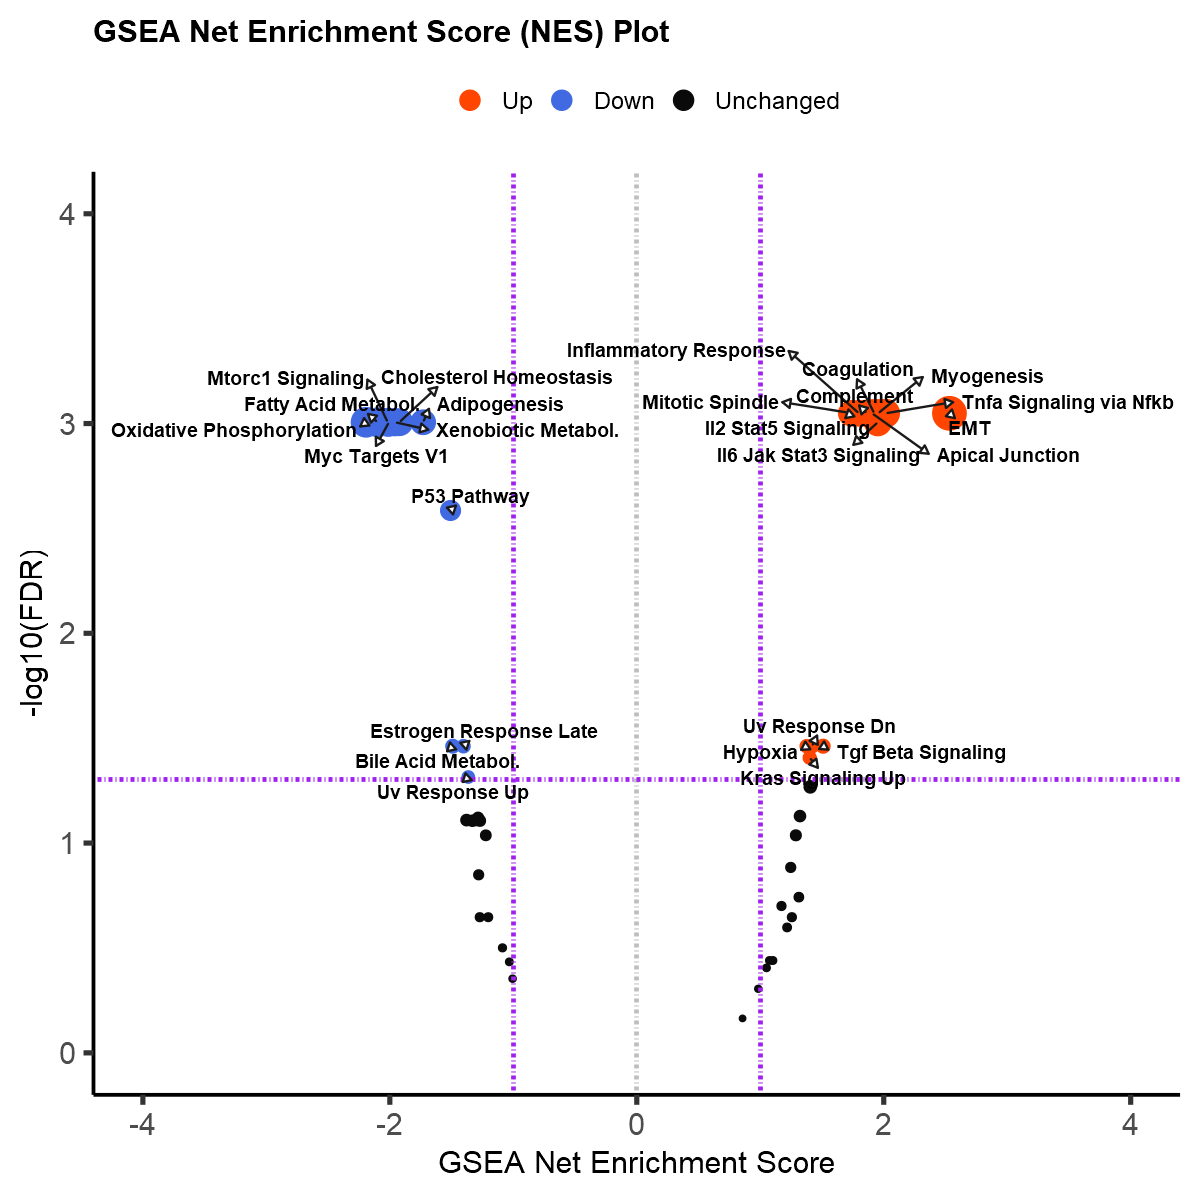

In [20]:
keyvals <- ifelse(
    (df_gsea$NES < -1.0) & (df_gsea$p.adjust <= 0.05), 'royalblue',
    ifelse((df_gsea$NES > 1) & (df_gsea$p.adjust <= 0.05), 'orangered', 'grey4'))
keyvals[is.na(keyvals)] <- 'black'
names(keyvals)[keyvals == 'orangered'] <- 'Up'
names(keyvals)[keyvals == 'grey4'] <- 'Unchanged'
names(keyvals)[keyvals == 'royalblue'] <- 'Down'

Sig_path <- df_gsea[abs(df_gsea$NES)>=1 & df_gsea$p.adjust <= 0.05,]
Sig_path <- Sig_path$Description

gg <- EnhancedVolcano(df_gsea,
                lab = rownames(df_gsea),
                caption = NULL, subtitle = NULL,
                x = 'NES',
                y = 'p.adjust', axisLabSize = 18,
                title = 'GSEA Net Enrichment Score (NES) Plot',
                xlab = "GSEA Net Enrichment Score", ylab = "-log10(FDR)",
                colCustom = keyvals,
                pointSize = c((abs(df_gsea$NES)*abs(-log10(df_gsea$p.adjust)))+1),
                xlim = c(-4, 4),
                ylim = c(0, 4),
                pCutoff = 5e-2, FCcutoff = 1, 
                selectLab = Sig_path,
                maxoverlapsConnectors = length(Sig_path),
                legendDropLevels = TRUE,
                legendLabels = c('Up', 'Down', 'Unchanged'),
                labSize = 4, labCol = 'black', labFace = 'bold',
                colAlpha = 1,
                cutoffLineType = 'blank', cutoffLineCol = 'black', cutoffLineWidth = 0.8,
                hline = c(5e-2), hlineCol = c('purple'), hlineType = c('dotdash'), hlineWidth = c(1),
                vline = c(-1, 0, 1), vlineCol = c('purple', 'grey','purple'), vlineWidth = c(1),
                vlineType = c('dotdash'),
                gridlines.major = FALSE, gridlines.minor = FALSE,
                drawConnectors = TRUE, arrowheads = TRUE, widthConnectors = 0.5)
print_figure(gg, width=10, height=10,
    file=sprintf("EnhancedVolcano_plot.%s.gsea", condstr))

### Ribo-seq GSEA enrichment plot

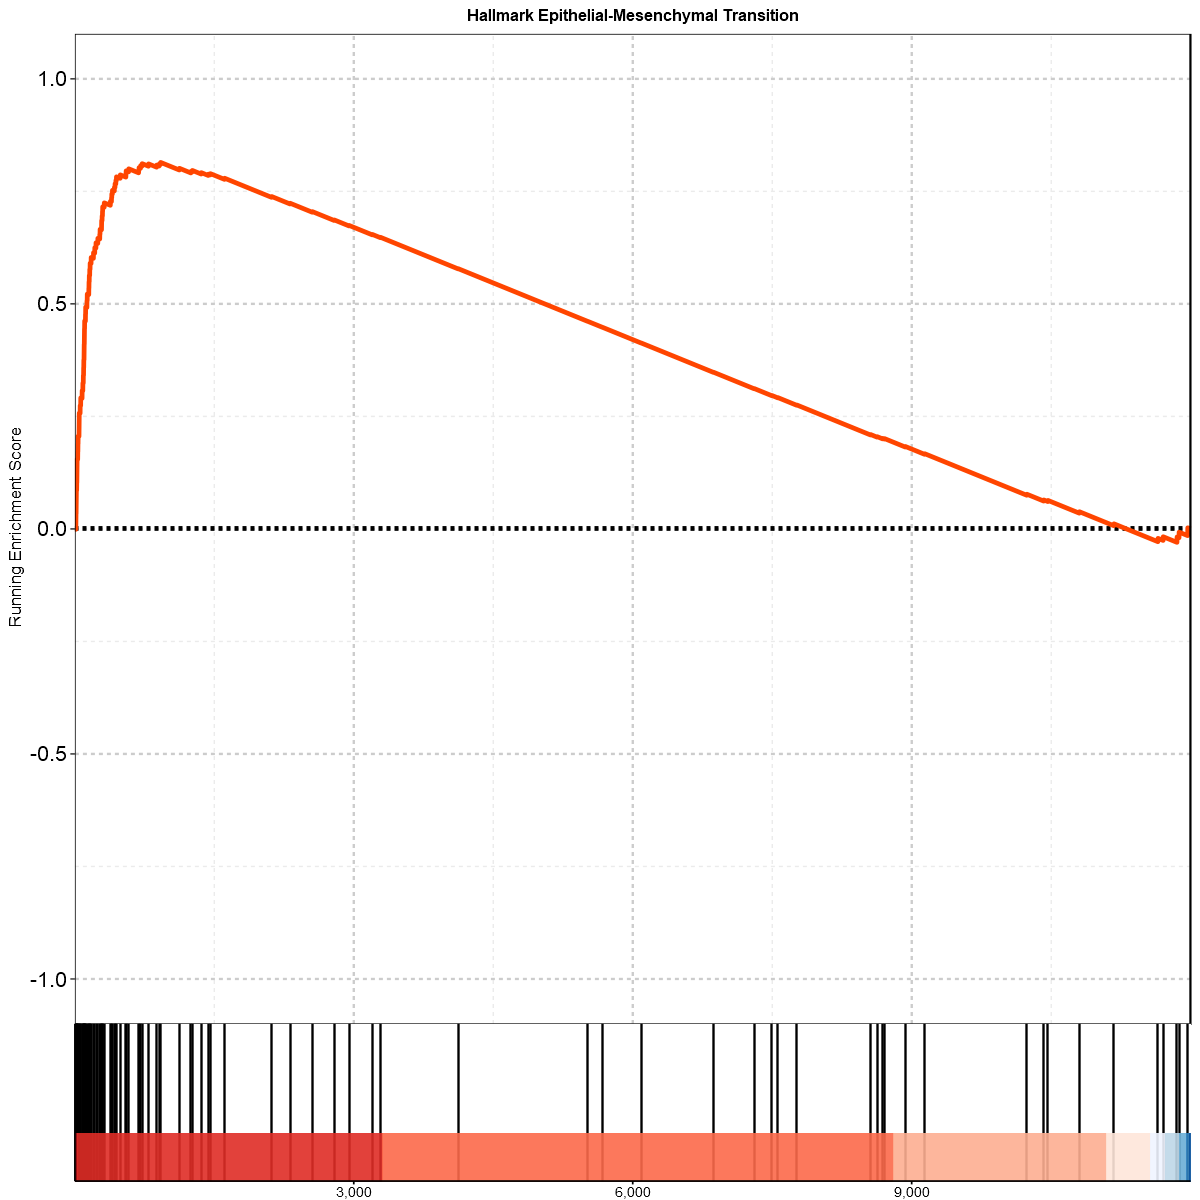

In [21]:
Title <- "Hallmark Epithelial-Mesenchymal Transition"
title <- "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"

gseaplot3(gsea_h_gene_sets, geneSetID = title, title = Title, color = "orangered", 
    base_size = 8, rel_heights = c(1.5, 0.25, 1), subplots = 1:2, pvalue_table = FALSE, 
    ES_geom = "line")

#print_figure(gg, width = 4, height = 4, f_display2screen = TRUE, file = sprintf("Ribo-seq.GSEA plot.%s.%s%s", 
#    condstr, title, type_gmt))

### GSEA plot for all significant hallmark pathways

In [22]:
df_subset <- df_gsea[(abs(df_gsea$NES)>=1 & (df_gsea$p.adjust <= 0.01)),]
f <- !grepl(paste0(c("BILE_ACID_METABOLISM", "CHOLESTEROL_HOMEOSTASIS", "HEME_METABOLISM", "ALLOGRAFT_REJECTION",
                    "PANCREAS_BETA_CELLS", "ESTROGEN", "ANDROGEN", "XENOBIOTIC_METABOLISM"), collapse = "|"), df_subset$ID)
df_subset <- df_subset[f,]
IDs <- df_subset$ID
col=ifelse(df_subset$NES >1, "orangered", "#0055ee")
i=0
for (ID in IDs) {i=i+1
  verb('%s\t %s\n', rownames(gsea_h_gene_sets[gsea_h_gene_sets$ID %in% ID,]), gsea_h_gene_sets[gsea_h_gene_sets$ID %in% ID,]$NES)
  id <- rownames(df_subset[df_subset$ID %in% ID,])
  title <- paste0(id, " (NES = ", round(gsea_h_gene_sets[gsea_h_gene_sets$ID %in% ID,]$NES, digits = 3), ", FDR = ", 
                  round(gsea_h_gene_sets[gsea_h_gene_sets$ID %in% ID,]$p.adjust, digits = 3),")") 
  #verb('%s\n', title)
  gg <- gseaplot3(gsea_h_gene_sets, geneSetID = ID, title = title,
    color = col[i], base_size = 8, rel_heights = c(1.5, 0.25, 1), subplots = 1:2, pvalue_table = FALSE, ES_geom = "line")
  print_figure(gg, width=6, height=6, f_display2screen=FALSE, file=sprintf("%s.GSEA.%s.plot", condstr, tolower(ID)))
}

HALLMARK_MITOTIC_SPINDLE	 1.74660643795313
HALLMARK_TNFA_SIGNALING_VIA_NFKB	 2.01422826323314
HALLMARK_IL2_STAT5_SIGNALING	 1.73464396318094
HALLMARK_COMPLEMENT	 1.86330776721834
HALLMARK_APICAL_JUNCTION	 1.9056788607076
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION	 2.53229401293718
HALLMARK_MYOGENESIS	 1.954862694121
HALLMARK_INFLAMMATORY_RESPONSE	 1.79924202346906
HALLMARK_COAGULATION	 1.92322412835848
HALLMARK_FATTY_ACID_METABOLISM	 -2.09921911040123
HALLMARK_ADIPOGENESIS	 -1.73012197478328
HALLMARK_OXIDATIVE_PHOSPHORYLATION	 -2.19256496448408
HALLMARK_MTORC1_SIGNALING	 -2.01750224621318
HALLMARK_MYC_TARGETS_V1	 -2.00737213509572
HALLMARK_IL6_JAK_STAT3_SIGNALING	 1.95214950990307
HALLMARK_P53_PATHWAY	 -1.50823103186864


## Ribo-seq TGF$\beta$ Vs. TGF$\beta$ + CX5461

### Ribo-seq volcano plot

In [23]:
condstr <- 'Ribo-seq.TGFb.CX5461'

nv <- sign(df_all$log2FCtgfbVStgfbCX5461.translation)*(-log10(df_all$PtgfbVStgfbCX5461.translation))
names(nv) <- rownames(df_all);
f <- is.finite(nv); t <- min(nv[f]); nv[nv < t] <- t*1.1; t <- max(nv[f]); nv[nv > t] <- t*1.1


set.seed(seed_gsea)
gsea_all <- GSEA(sort(nv[!is.na(nv)], decreasing=T), exponent =1,
                 nPerm = 10000, minGSSize = 5, maxGSSize = 500,   
                 pvalueCutoff = 0.99, pAdjustMethod = "BH", 
                 TERM2GENE=gmt_mus, TERM2NAME=NA, seed=FALSE, by="fgsea")

head(gsea_all); dim(gsea_all)

gsea_h_gene_sets <- GSEA(sort(nv[!is.na(nv)], decreasing=T), exponent =1,
                         nPerm = 10000, minGSSize = 5, maxGSSize = 500,   
                         pvalueCutoff = 0.99, pAdjustMethod = "BH", 
                         TERM2GENE=h_gene_sets, TERM2NAME=NA, seed=FALSE, by="fgsea")
head(gsea_h_gene_sets); dim(gsea_h_gene_sets)

preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
"We do not recommend using nPerm parameter incurrent and future releases"
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
"You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.74% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
leading edge analysis...

done...



,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
KEGG_RIBOSOME,KEGG_RIBOSOME,KEGG_RIBOSOME,82,0.8564058,2.761612,0.0001913876,0.009597031,0.008148686,760,"tags=61%, list=6%, signal=58%",Rpl23/Rplp0/Rps17/Rps4x/Rps9/Rpl13a/Rps11/Rps24/Rpl32/Rplp2/Rps3/Rpl8/Rps15a/Rps26/Rpl26/Rpl37a/Rpl11/Rpl22/Rpl18/Rps15/Rpl31/Fau/Rpl7/Mrpl13/Rps27/Rps3a1/Rpl3/Rps12/Rpl30/Rpl22l1/Rpl38/Rpl23a/Rpl4/Rps5/Rps23/Rpl36/Rpl28/Rps10/Rps21/Rps19/Rps27a/Rps29/Rps6/Rpsa/Rpl19/Rps27l/Rps7/Rps16/Rpl37/Rpl15
KEGG_ARRHYTHMOGENIC_RIGHT_VENTRICULAR_CARDIOMYOPATHY_ARVC,KEGG_ARRHYTHMOGENIC_RIGHT_VENTRICULAR_CARDIOMYOPATHY_ARVC,KEGG_ARRHYTHMOGENIC_RIGHT_VENTRICULAR_CARDIOMYOPATHY_ARVC,34,-0.8027495,-2.237751,0.0002054654,0.009597031,0.008148686,1466,"tags=59%, list=12%, signal=52%",Itga3/Cacnb2/Itgav/Actn4/Itgb5/Itga2/Cacna2d1/Cdh2/Pkp2/Lmna/Ctnna1/Dsp/Itga5/Actg1/Ctnnb1/Itgb3/Jup/Itgb6/Actn1/Actb
KEGG_ECM_RECEPTOR_INTERACTION,KEGG_ECM_RECEPTOR_INTERACTION,KEGG_ECM_RECEPTOR_INTERACTION,38,-0.7960448,-2.257851,0.0002070393,0.009597031,0.008148686,243,"tags=47%, list=2%, signal=47%",Itga2/Lamb2/Col1a1/Lamc1/Lamb3/Itga5/Col5a1/Itgb3/Lama5/Itgb6/Sdc1/Agrn/Fn1/Hspg2/Col4a2/Col4a1/Spp1/Thbs1
KEGG_FOCAL_ADHESION,KEGG_FOCAL_ADHESION,KEGG_FOCAL_ADHESION,126,-0.6303771,-2.203210,0.0002120891,0.009597031,0.008148686,974,"tags=24%, list=8%, signal=22%",Col6a1/Itgb5/Vasp/Tln2/Pdgfa/Pak4/Egfr/Itga2/Pdgfb/Flna/Lamb2/Vcl/Col1a1/Lamc1/Lamb3/Itga5/Col5a1/Actg1/Ctnnb1/Itgb3/Lama5/Itgb6/Actn1/Tln1/Fn1/Col4a2/Actb/Col4a1/Spp1/Thbs1
KEGG_DILATED_CARDIOMYOPATHY,KEGG_DILATED_CARDIOMYOPATHY,KEGG_DILATED_CARDIOMYOPATHY,35,-0.6788786,-1.900049,0.0004122861,0.014924758,0.012672374,1707,"tags=40%, list=14%, signal=34%",Cacnb3/Itga3/Cacnb2/Itgav/Itgb5/Adcy6/Itga2/Cacna2d1/Lmna/Itga5/Actg1/Itgb3/Itgb6/Actb
KEGG_LEUKOCYTE_TRANSENDOTHELIAL_MIGRATION,KEGG_LEUKOCYTE_TRANSENDOTHELIAL_MIGRATION,KEGG_LEUKOCYTE_TRANSENDOTHELIAL_MIGRATION,56,-0.5912441,-1.814861,0.0006235710,0.018811058,0.015972169,912,"tags=21%, list=8%, signal=20%",Vcam1/Vasp/Mmp9/Cldn4/Ctnna1/Vcl/Actg1/Ctnnb1/Actn1/Msn/Cldn2/Actb


[1] 158  11

preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
"We do not recommend using nPerm parameter incurrent and future releases"
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
"You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.74% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
leading edge analysis...

done...



,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
HALLMARK_OXIDATIVE_PHOSPHORYLATION,HALLMARK_OXIDATIVE_PHOSPHORYLATION,HALLMARK_OXIDATIVE_PHOSPHORYLATION,193,0.4690798,1.698540,0.0001842299,0.001342642,0.0007914523,1490,"tags=33%, list=12%, signal=29%",Uqcrb/Cox7a2l/Ndufa8/Cox4i1/Cox5b/Bax/Cox5a/Hspa9/Ndufb1/Cox7a2/Cox7b/Ndufv2/Afg3l2/Gpx4/Ndufb8/Ndufs3/Ndufa6/Cyb5r3/Cox8a/Atp6v1d/Atp5h/Hsd17b10/Sdhd/Uqcrq/Ndufa7/Atp5k/Uqcr10/Cox6a1/Ndufa5/Ndufb2/Atp5c1/Atp6v1f/Idh2/Decr1/Idh3b/Ndufa2/Dld/Hadhb/Atp6v0c/Sdhc/Cox6c/Atp6v1c1/Mrpl35/Ndufb6/Grpel1/Rhot2/Ndufb5/Vdac3/Oxa1l/Prdx3/Echs1/Ndufa4/Ndufa3/Ndufb7/Eci1/Acaa2/Atp5pb/Atp6v1g1/Ndufs2/Ndufs6/Ndufs8/Ech1/Timm17a
HALLMARK_P53_PATHWAY,HALLMARK_P53_PATHWAY,HALLMARK_P53_PATHWAY,165,0.5071042,1.799523,0.0001842978,0.001342642,0.0007914523,1486,"tags=25%, list=12%, signal=23%",Atf3/Mdm2/Tsc22d1/Cdkn1a/Btg2/Ctsd/Gadd45a/Rpl18/Ddit3/Txnip/Rps12/Ninj1/Ier5/Epha2/Rpl36/Ier3/Ccng1/Bax/Traf4/Rchy1/Dcxr/Fam162a/Zfp36l1/Ak1/Pmm1/Lif/Hint1/Rps27l/Stom/Ifi30/Plk3/Aen/S100a10/Hmox1/Rb1/Perp/Tax1bp3/Klf4/Fuca1/Fas/H1f2/Ankra2
HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,150,0.5535519,1.936573,0.0001851852,0.001342642,0.0007914523,670,"tags=27%, list=6%, signal=26%",Atf3/Ccl2/Ccnl1/Clcf1/Fosl1/Cebpb/Hes1/Id2/Tsc22d1/Cdkn1a/Egr1/Zfp36/Btg2/Tiparp/Gadd45a/Phlda1/Fosb/Csf2/Sdc4/Sqstm1/Gadd45b/Dusp5/Pfkfb3/Ninj1/Ier5/Areg/Ier3/Tgif1/Klf6/Litaf/Bcl3/Pnrc1/Nfil3/Klf10/Nfe2l2/Junb/Lif/Bhlhe40/Plaur/Maff/Map2k3
HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V1,201,0.4465904,1.623890,0.0001858391,0.001342642,0.0007914523,1582,"tags=27%, list=13%, signal=24%",Eif4a1/Rplp0/Ifrd1/Psmd8/Rps3/Npm1/Rpl22/Rpl18/Ywhae/Psma7/Rps5/Snrpd1/Mrps18b/Cox5a/Rps10/Erh/Rps6/Snrpa1/Srsf3/Snrpb2/Nme1/Mrpl9/U2af1/Psmb2/Snrpg/Odc1/Vbp1/Psmb3/C1qbp/Psmc6/Psma2/Hdgf/Ssb/Eif3j2/Vdac3/Prdx3/Pa2g4/Bub3/H2az1/Rpl34/Hnrnpa3/Impdh2/Eif2s2/Ran/Prdx4/Ywhaq/Hddc2/Srsf7/Rpl14/Hnrnpa1/Hprt/Etf1/Ranbp1/Cops5
HALLMARK_COAGULATION,HALLMARK_COAGULATION,HALLMARK_COAGULATION,72,-0.6007331,-1.926032,0.0002105706,0.001342642,0.0007914523,921,"tags=26%, list=8%, signal=25%",Prep/Mmp9/Mmp14/Lgmn/Gnb2/Olr1/Itga2/Lrp1/Acox2/Pdgfb/Anxa1/Sparc/Dusp6/Itgb3/Fn1/Clu/F3/Serpine1/Thbs1
HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,112,-0.5367668,-1.836572,0.0002134927,0.001342642,0.0007914523,2390,"tags=38%, list=20%, signal=30%",Insig1/Nectin2/Baiap2/Wnk4/Atp1a3/Pkd1/Col16a1/Zyx/Mpzl2/Pfn1/Gnai2/Taok2/Skap2/Shroom2/Myl12b/Pcdh1/Tubg1/Sympk/Itga3/Exoc4/Mvd/Nf2/Actn4/Vcam1/Vasp/Mmp9/Actg2/Cldn4/Cdh6/Egfr/Acta1/Itga2/Ctnna1/Vcl/Cdh1/Lamb3/Actg1/Jup/Actn1/Msn/Actb/Myh9


[1] 50 11

In [24]:
df_gsea <- as.data.frame(gsea_h_gene_sets)
idx <- order(df_gsea$p.adjust)
df_gsea <- df_gsea[idx,]

# change name
df_gsea$Description <- tolower(df_gsea$Description)
df_gsea$Description <- mgsub::mgsub(df_gsea$Description,
        tolower(c('HALLMARK','KEGG','EPITHELIAL_MESENCHYMAL_TRANSITION','_')),
        c('','','EMT',' '))
df_gsea$Description <- stringr::str_to_title(df_gsea$Description)
df_gsea$Description <- mgsub::mgsub(df_gsea$Description,
        c('Emt', 'Via','Metabolism'), c('EMT', 'via', 'Metabol.'))
rownames(df_gsea) <- df_gsea$Description

df_gsea$Description

[1] " Oxidative Phosphorylation"       " P53 Pathway"                    
 [3] " Tnfa Signaling via Nfkb"         " Myc Targets V1"                 
 [5] " Coagulation"                     " Apical Junction"                
 [7] " EMT"                             " Uv Response Dn"                 
 [9] " Dna Repair"                      " Hypoxia"                        
[11] " Complement"                      " Myogenesis"                     
[13] " Angiogenesis"                    " Allograft Rejection"            
[15] " Unfolded Protein Response"       " Apoptosis"                      
[17] " Glycolysis"                      " Uv Response Up"                 
[19] " Il2 Stat5 Signaling"             " Cholesterol Homeostasis"        
[21] " Hedgehog Signaling"              " Wnt Beta Catenin Signaling"     
[23] " E2f Targets"                     " Pi3k Akt Mtor Signaling"        
[25] " Inflammatory Response"           " Heme Metabol."                  
[27] " Protein Secretion"               " Mitotic Spindle"                
[29] " Estrogen Response Early"         " Androgen Response"              
[31] " Kras Signaling Up"               " Peroxisome"                     
[33] " Adipogenesis"                    " Bile Acid Metabol."             
[35] " Myc Targets V2"                  " Reactive Oxygen Species Pathway"
[37] " Mtorc1 Signaling"                " Pancreas Beta Cells"            
[39] " Tgf Beta Signaling"              " Fatty Acid Metabol."            
[41] " Xenobiotic Metabol."             " Il6 Jak Stat3 Signaling"        
[43] " Apical Surface"                  " G2m Checkpoint"                 
[45] " Interferon Gamma Response"       " Estrogen Response Late"         
[47] " Notch Signaling"                 " Interferon Alpha Response"      
[49] " Spermatogenesis"                 " Kras Signaling Dn"

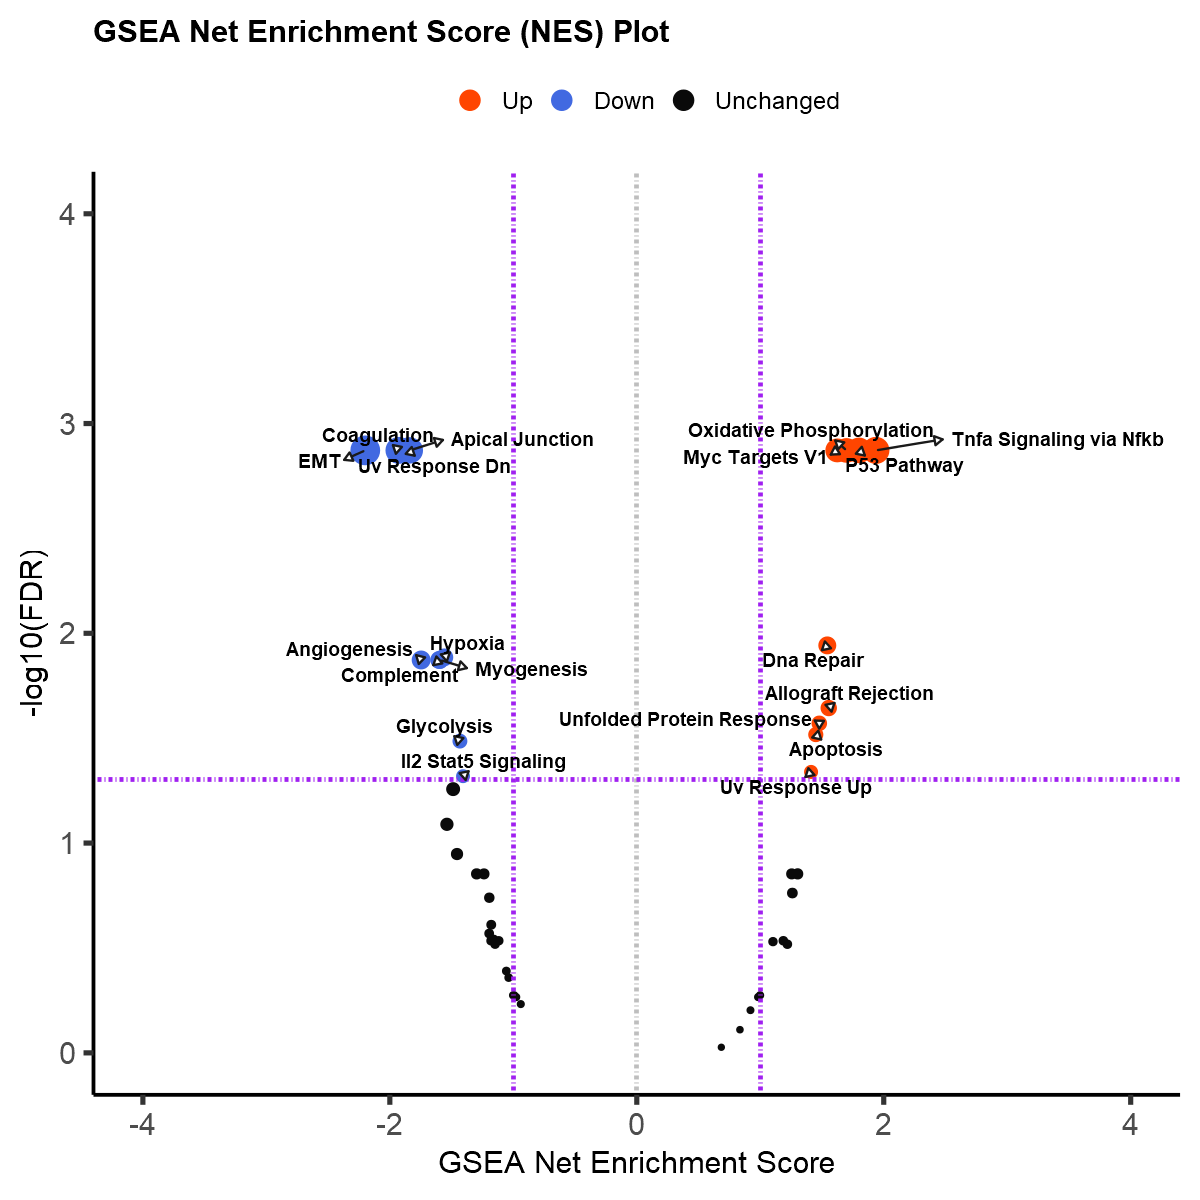

In [25]:
keyvals <- ifelse(
    (df_gsea$NES < -1.0) & (df_gsea$p.adjust <= 0.05), 'royalblue',
    ifelse((df_gsea$NES > 1) & (df_gsea$p.adjust <= 0.05), 'orangered', 'grey4'))
keyvals[is.na(keyvals)] <- 'black'
names(keyvals)[keyvals == 'orangered'] <- 'Up'
names(keyvals)[keyvals == 'grey4'] <- 'Unchanged'
names(keyvals)[keyvals == 'royalblue'] <- 'Down'

Sig_path <- df_gsea[abs(df_gsea$NES)>=1 & df_gsea$p.adjust <= 0.05,]
Sig_path <- Sig_path$Description

gg <- EnhancedVolcano(df_gsea,
                lab = rownames(df_gsea),
                caption = NULL, subtitle = NULL,
                x = 'NES',
                y = 'p.adjust', axisLabSize = 18,
                title = 'GSEA Net Enrichment Score (NES) Plot',
                xlab = "GSEA Net Enrichment Score", ylab = "-log10(FDR)",
                colCustom = keyvals,
                pointSize = c((abs(df_gsea$NES)*abs(-log10(df_gsea$p.adjust)))+1),
                xlim = c(-4, 4),
                ylim = c(0, 4),
                pCutoff = 5e-2, FCcutoff = 1, 
                selectLab = Sig_path,
                maxoverlapsConnectors = length(Sig_path),
                legendDropLevels = TRUE,
                legendLabels = c('Up', 'Down', 'Unchanged'),
                labSize = 4, labCol = 'black', labFace = 'bold',
                colAlpha = 1,
                cutoffLineType = 'blank', cutoffLineCol = 'black', cutoffLineWidth = 0.8,
                hline = c(5e-2), hlineCol = c('purple'), hlineType = c('dotdash'), hlineWidth = c(1),
                vline = c(-1, 0, 1), vlineCol = c('purple', 'grey','purple'), vlineWidth = c(1),
                vlineType = c('dotdash'),
                gridlines.major = FALSE, gridlines.minor = FALSE,
                drawConnectors = TRUE, arrowheads = TRUE, widthConnectors = 0.5)
print_figure(gg, width=10, height=10,
    file=sprintf("EnhancedVolcano_plot.%s.gsea", condstr))

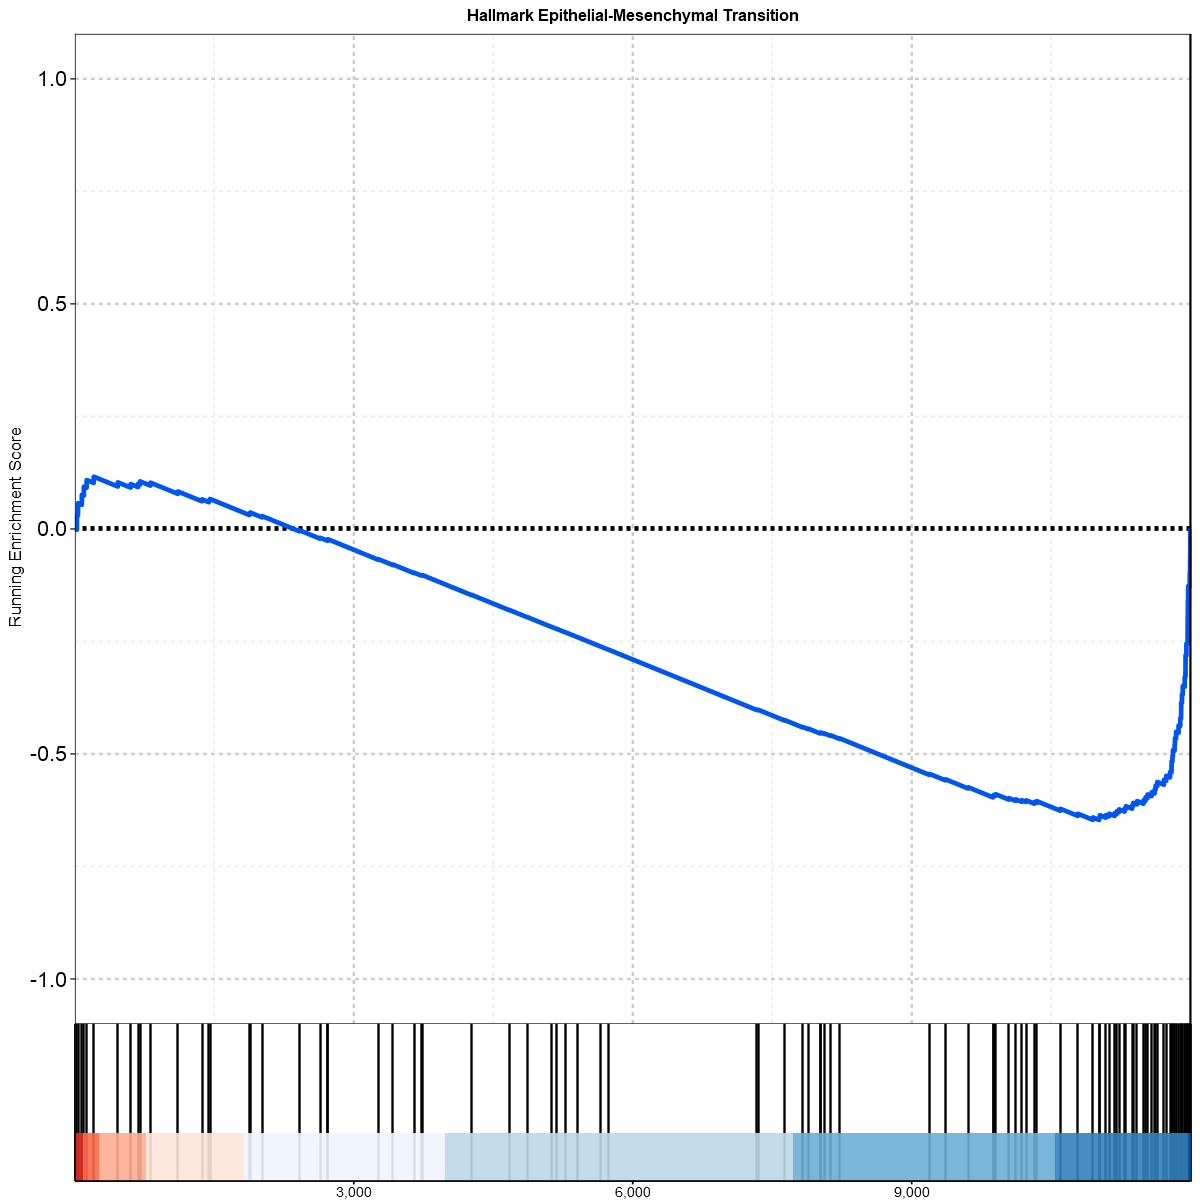

In [26]:
Title <- "Hallmark Epithelial-Mesenchymal Transition"
title <- "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"
gseaplot3(gsea_h_gene_sets, geneSetID = title, title = Title, color = "#0055ee", 
    base_size = 8, rel_heights = c(1.5, 0.25, 1), subplots = 1:2, 
    ES_geom = "line")

#print_figure(gg, width = 4, height = 4, f_display2screen = TRUE, file = sprintf("Ribo-seq.GSEA plot.%s.%s%s", 
#    condstr, title, type_gmt))

### GSEA plot for all significant hallmark pathways

In [27]:
df_subset <- df_gsea[(abs(df_gsea$NES)>=1 & (df_gsea$p.adjust <= 0.01)),]
f <- !grepl(paste0(c("BILE_ACID_METABOLISM", "CHOLESTEROL_HOMEOSTASIS", "HEME_METABOLISM", "ALLOGRAFT_REJECTION",
                    "PANCREAS_BETA_CELLS", "ESTROGEN", "ANDROGEN", "XENOBIOTIC_METABOLISM"), collapse = "|"), df_subset$ID)
df_subset <- df_subset[f,]
IDs <- df_subset$ID
col=ifelse(df_subset$NES >1, "orangered", "#0055ee")
i=0
for (ID in IDs) {i=i+1
  verb('%s\t %s\n', rownames(gsea_h_gene_sets[gsea_h_gene_sets$ID %in% ID,]), gsea_h_gene_sets[gsea_h_gene_sets$ID %in% ID,]$NES)
  id <- rownames(df_subset[df_subset$ID %in% ID,])
  title <- paste0(id, " (NES = ", round(gsea_h_gene_sets[gsea_h_gene_sets$ID %in% ID,]$NES, digits = 3), ", FDR = ", 
                  round(gsea_h_gene_sets[gsea_h_gene_sets$ID %in% ID,]$p.adjust, digits = 3),")") 
  #verb('%s\n', title)
  gg <- gseaplot3(gsea_h_gene_sets, geneSetID = ID, title = title,
    color = col[i], base_size = 8, rel_heights = c(1.5, 0.25, 1), subplots = 1:2, pvalue_table = FALSE, ES_geom = "line")
  print_figure(gg, width=6, height=6, f_display2screen=FALSE, file=sprintf("%s.GSEA.%s.plot", condstr, tolower(ID)))
}

HALLMARK_OXIDATIVE_PHOSPHORYLATION	 1.69853992192174
HALLMARK_P53_PATHWAY	 1.7995231504004
HALLMARK_TNFA_SIGNALING_VIA_NFKB	 1.93657262236245
HALLMARK_MYC_TARGETS_V1	 1.62388976861129
HALLMARK_COAGULATION	 -1.92603210617074
HALLMARK_APICAL_JUNCTION	 -1.83657153086615
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION	 -2.19892879744178
HALLMARK_UV_RESPONSE_DN	 -1.84706086066698


# Heatmap plot for GSEA pathways

In [28]:
Exp <- read.table("blancgrp_211613_RNAseq_total_stranded_HTSeq.counts.raw.txt")
sampleTable <- data.frame(Condition = factor(rep(c("Control", "TGFB", "TGFb_CX5461"), each = 3)))
rownames(sampleTable) <- colnames(Exp)
ann_col = list(ID = c(Control = "red", TGFB="blue", CX5461="green"))

Exp <- as.data.frame(Exp)
head(Exp)

,JBQS001,JBQS002,JBQS003,JBQS004,JBQS005,JBQS006,JBQS007,JBQS008,JBQS009
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
__alignment_not_unique,0,0,0,0,0,0,0,0,0
__ambiguous,2560090,1985537,2111861,2173495,2588939,2547004,1475506,2456396,1492933
__no_feature,7214805,5557028,6265574,5430678,6721998,7243883,4780631,6372950,4928527
__not_aligned,108660468,83657393,91248863,86022491,99134745,117253539,75553198,101248621,67440141
rDNA_promoter,0,0,0,0,0,0,0,0,0
rDNA_promoter1,0,0,0,0,0,0,0,0,0


In [30]:
IDs <- gsea_h_gene_sets$ID



col=ifelse(df_subset$NES >1, "orangered", "#0055ee")
i=0
for (ID in IDs) {
    i=i+1
    verb('%s\n', ID)
    genes <- unlist(strsplit(df_gsea$core_enrichment, "/")[i])
    pheatmap::pheatmap(Exp[rownames(Exp)%in%genes,], color = hcl.colors(7, "Fall"), scale = "column", annotation_col=sampleTable, 
         annotation_colors=ann_col, filename = sprintf("./tiff/Heatmap.GSEA.%s.tiff", tolower(ID)), fontsize = 10)
}

HALLMARK_OXIDATIVE_PHOSPHORYLATION
HALLMARK_P53_PATHWAY
HALLMARK_TNFA_SIGNALING_VIA_NFKB
HALLMARK_MYC_TARGETS_V1
HALLMARK_COAGULATION
HALLMARK_APICAL_JUNCTION
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION
HALLMARK_UV_RESPONSE_DN
HALLMARK_DNA_REPAIR
HALLMARK_HYPOXIA
HALLMARK_COMPLEMENT
HALLMARK_MYOGENESIS
HALLMARK_ANGIOGENESIS
HALLMARK_ALLOGRAFT_REJECTION
HALLMARK_UNFOLDED_PROTEIN_RESPONSE
HALLMARK_APOPTOSIS
HALLMARK_GLYCOLYSIS
HALLMARK_UV_RESPONSE_UP
HALLMARK_IL2_STAT5_SIGNALING
HALLMARK_CHOLESTEROL_HOMEOSTASIS
HALLMARK_HEDGEHOG_SIGNALING
HALLMARK_WNT_BETA_CATENIN_SIGNALING
HALLMARK_E2F_TARGETS
HALLMARK_PI3K_AKT_MTOR_SIGNALING
HALLMARK_INFLAMMATORY_RESPONSE
HALLMARK_HEME_METABOLISM
HALLMARK_PROTEIN_SECRETION
HALLMARK_MITOTIC_SPINDLE
HALLMARK_ESTROGEN_RESPONSE_EARLY
HALLMARK_ANDROGEN_RESPONSE
HALLMARK_KRAS_SIGNALING_UP
HALLMARK_PEROXISOME
HALLMARK_ADIPOGENESIS
HALLMARK_BILE_ACID_METABOLISM
HALLMARK_MYC_TARGETS_V2
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY
HALLMARK_MTORC1_SIGNALING
HALLMARK_P

Warning message in min(x, na.rm = T):
"no non-missing arguments to min; returning Inf"
Warning message in max(x, na.rm = T):
"no non-missing arguments to max; returning -Inf"


ERROR: Error in seq.default(-m, m, length.out = n + 1): 'from' must be a finite number
